In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import pymc3 as pm
import scipy as sp
import pyccl as ccl
import os
import utils
from make_data import MakeData
import getdist
from getdist import plots, MCSamples
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load data

In [2]:
names_planck  = ['H0_gp', 'omega_m', 's80', 'S80']
labels_planck = [r'H_0', r'\omega_{\rm{m}}', r'\sigma_{\rm{8}}',  r'\S_{\rm{8}}']

planck1 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

planck_params = []
for item in planck_tot:
    planck_params.append([item[29], item[32], item[34], item[35]])
planck_params = np.array(planck_params)
planck_samples = MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


In [3]:
z_max = 1110
res = 200
x_arr = np.linspace(0, np.log(1+z_max), res)
dx = np.mean(np.diff(x_arr))
z_arr = np.exp(x_arr)-1
a_arr = 1./(1+z_arr)

path = '/home/jaimerz/PhD/Growz/data/products'

data_class = MakeData(z_max, res , path)
Planck = data_class.Planck
z_planck = data_class.z_planck
c = data_class.c

DESI_data = data_class.get_DESI(new=True, mode=None)
WFIRST_data = data_class.get_WFIRST(new=True)
CC_data = data_class.get_CC(new=True)
DSS_data = data_class.get_DSS(new=True)
BOSS_data = data_class.get_BOSS(new=True)
eBOSS_data = data_class.get_eBOSS(new=True)
Wigglez_data = data_class.get_Wigglez(new=True)
DS17_data = data_class.get_DS17(new=True)
CMB_data = data_class.get_CMB(new=True)
FCMB_data = data_class.get_FCMB(new=True)

In [4]:
def get_m_s(rows):
    cols = np.transpose(rows)
    means = np.array([])
    sigmas = np.array([])
    for col in cols:
        mean = np.mean(col)
        sigma = np.std(col)
        means = np.append(means, mean)
        sigmas = np.append(sigmas, sigma)
    return means, sigmas

In [6]:
path = '/home/jaimerz/PhD/Growz/data/outputs/'
All = np.load(os.path.join(path,'All_10000_10000/samples.npz'))
All_gro = np.load(os.path.join(path,'All_gro_30000_30000/samples.npz'))
All_CMB = np.load(os.path.join(path,'All_CMB_50000_50000/samples.npz'))
All_CMB_nowm = np.load(os.path.join(path,'All_CMB_nowm_10000_10000/samples.npz'))
All_CMB_hp = np.load(os.path.join(path,'All_CMB_hp_10000_10000/samples.npz'))
All_CMB_gro_hp = np.load(os.path.join(path,'All_CMB_gro_hp_10000_10000/samples.npz'))
All_CMB_geo_hp = np.load(os.path.join(path,'All_CMB_geo_hp_30000_30000/samples.npz'))
All_CMB_fm = np.load(os.path.join(path,'All_CMB_fm_10000_10000/samples.npz'))
All_CMB_geo = np.load(os.path.join(path,'All_CMB_geo_30000_30000/samples.npz'))
All_CMB_gro = np.load(os.path.join(path,'All_CMB_gro_30000_30000/samples.npz'))
All_CMB_gro_CMB = np.load(os.path.join(path,'All_CMB_gro_30000_30000/samples.npz'))
All_CMB_Xi = np.load(os.path.join(path,'All_CMB_Xi_10000_10000/samples.npz'))
All_CMB_Xi_wm = np.load(os.path.join(path,'All_CMB_Xi_wm_10000_10000/samples.npz'))
All_CMB_Xi_full = np.load(os.path.join(path,'All_CMB_Xi_full_30000_30000/samples.npz'))
SDSS = np.load(os.path.join(path,'fulls/SDSS_1000_2500/samples.npz'))
SDSS_CMB = np.load(os.path.join(path,'SDSS_CMB_30000_30000/samples.npz'))
Add = np.load(os.path.join(path,'fulls/Add_1000_2500/samples.npz'))
Add_CMB = np.load(os.path.join(path,'Add_CMB_30000_30000/samples.npz'))
DESI = np.load(os.path.join(path,'fixed_eta/DESI_fixed_eta_100_100/samples.npz'))
DESI_CMB = np.load(os.path.join(path,'DESI_CMB_10000_10000/samples.npz'))
WFIRST_CMB = np.load(os.path.join(path,'WFIRST_CMB_10000_10000/samples.npz'))

cosmo1 = np.load(os.path.join(path,'All_CMB_cosmo1_10000_10000/samples.npz'))
cosmo2 = np.load(os.path.join(path,'All_CMB_cosmo2_10000_10000/samples.npz'))
cosmo3 = np.load(os.path.join(path,'All_CMB_cosmo3_30000_30000/samples.npz'))
cosmo4 = np.load(os.path.join(path,'All_CMB_cosmo4_30000_30000/samples.npz'))

In [40]:
All.files

['z_arr',
 'n',
 'l',
 'DHz',
 'Hz',
 'dMz',
 's8z',
 'fs8z',
 'H0_gp',
 'omega_m',
 'omega_b',
 'rd',
 's80',
 'S80']

In [41]:
def table_numbers(samples, sample_names):
    for i, sample in enumerate(samples):
        print(sample_names[i])
        if 'H0_gp' in sample.files:
            H0 = sample['H0_gp']
            H0_m = np.mean(H0)
            H0_s = np.std(H0)
            print('H0', H0_m, '+/-', H0_s)
        if 'S80' in sample.files:
            S80 = sample['S80']
            S80_m = np.mean(S80)
            S80_s = np.std(S80)
            print('S80', S80_m, '+/-', S80_s)
        if 's80' in sample.files:
            s80 = sample['s80']
            s80_m = np.mean(s80)
            s80_s = np.std(s80)
            print('s80', s80_m, '+/-', s80_s)
        if 'omega_m' in sample.files:
            wm = sample['omega_m']
            wm_m = np.mean(wm)
            wm_s = np.std(wm)  
            print('wm0', wm_m, '+/-', wm_s)
        print('-----')

In [65]:
table_numbers([All, All_CMB, All_CMB_nowm, All_CMB_hp, All_CMB_fm, All_gro, All_CMB_gro, SDSS_CMB, Add_CMB, DESI_CMB],
              ['All', 'All_CMB', 'All_CMB_nowm', 'All_CMB_hp', 'All_CMB_fm', 'All_gro', 'All_CMB_gro', 'SDSS_CMB', 'Add_CMB', 'DESI_CMB'])

All
H0 68.2476023084746 +/- 0.7722545807671884
S80 0.7888111820969074 +/- 0.028425840925703553
s80 0.9081772610483438 +/- 0.14970333344012243
wm0 0.10899728346089867 +/- 0.029410479109069267
-----
All_CMB
H0 67.8441514218702 +/- 0.9396379357548131
S80 0.797328771113114 +/- 0.030386167622411444
s80 0.9722486636116461 +/- 0.15464691609124093
wm0 0.0970861415903883 +/- 0.02755352663603456
-----
All_CMB_nowm
H0 67.91246618775224 +/- 0.9726262041917461
s80 0.7753771750553066 +/- 0.02873015346089282
-----
All_CMB_hp
H0 68.69018694196372 +/- 0.8349429644402585
S80 0.7884398571886068 +/- 0.03006707009927973
s80 0.9393197552250313 +/- 0.15707705095205748
wm0 0.10242470626360309 +/- 0.029940814719875537
-----
All_CMB_fm
H0 68.74115462551515 +/- 0.7902914942075867
S80 0.7769594719314071 +/- 0.028198532563074703
s80 0.9205525038401391 +/- 0.13049567978508342
wm0 0.11970148860684006 +/- 0.036647545104360295
-----
All_gro
H0 73.44336795375202 +/- 28.286533332765636
S80 0.800506200874402 +/- 0.047139

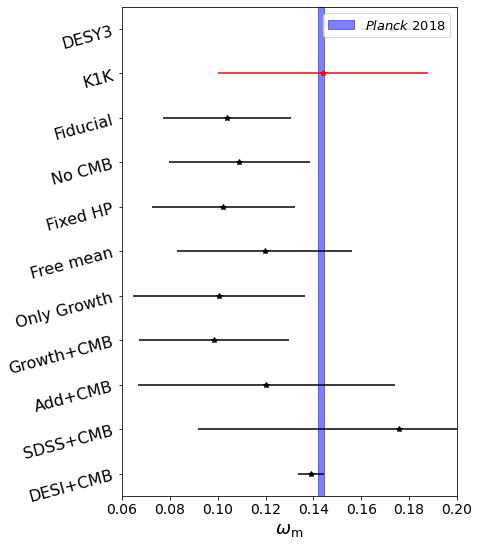

In [67]:
y = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
my_yticks = ['DESY3', 'K1K',
             'Fiducial', 'No CMB', 'Fixed HP',
             'Free mean', 'Only Growth', 'Growth+CMB', 
             'Add+CMB', 'SDSS+CMB', 'DESI+CMB']

wm = [0.173, 0.144, 
      0.10386661974360806, 0.10899728346089867, 0.10242470626360309, 
      0.11970148860684006, 0.10053695379968673, 0.09837559602012647, 
      0.12036299104560348, 0.17570649858916523, 0.13914245530235217]
wm_err = [0.013, 0.044,
          0.026737555411066653, 0.029410479109069267, 0.029940814719875537,
          0.036647545104360295, 0.03607207942308892, 0.031259745293196965,
          0.053855749385132344, 0.08374692088345725,  0.005401754588497647]
    
plt.figure(figsize=(6,9))

plt.xlabel(r'$\omega_{\rm{m}}$', fontsize=18)

plt.errorbar( wm[0], y[0], xerr=np.transpose(wm_err[0]), fmt='g.')
plt.plot( wm[0], y[0], 'g*')

plt.errorbar( wm[1], y[1], xerr=np.transpose(wm_err[1]), fmt='r.')
plt.plot( wm[1], y[1], 'r*')

plt.errorbar( wm[2:], y[2:], xerr=np.transpose(wm_err[2:]), fmt='k.')
plt.plot( wm[2:], y[2:], 'k*')

plt.axvspan(0.1432 - 0.0013, 0.1432 + 0.0013, alpha = 0.5, color='b',  label= r'$Planck$ 2018')

plt.legend(loc = 1, prop={'size': 13})

plt.axis([0.06, 0.20,  y[-1]+1 ,-1,])

plt.yticks(y, my_yticks, fontsize=16)
plt.yticks(rotation=15)

plt.xticks(fontsize=14)

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/S8_comp.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/S8_comp.pdf')

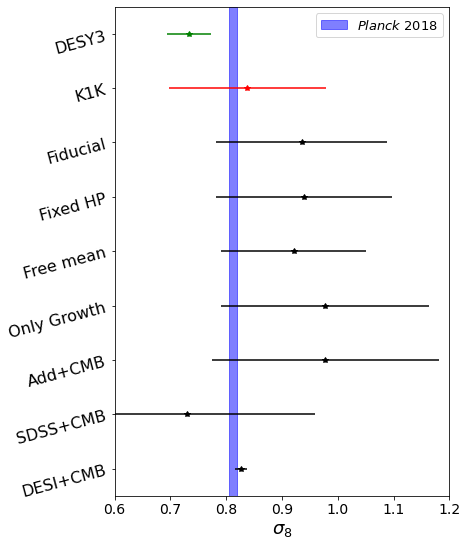

In [10]:
y = [0,2,4,6,8,10,12,14, 16]
my_yticks = ['DESY3', 'K1K', 'Fiducial', 'Fixed HP', r'Free mean', r'Only Growth', r'Add+CMB', r'SDSS+CMB', r'DESI+CMB']

s8 = [0.733, 0.838, 
      0.9348473338673903, 0.9393197552250313,  0.9205525038401391,
      0.9770679201682868, 0.9770679201682868 , 0.7304002345459498,
      0.8260835325104771]
s8_err = [0.04, 0.141, 
          0.15342594051311603, 0.15707705095205748, 0.13049567978508342,
          0.1856286592698678, 0.20341238814542661, 0.22945335737171,
          0.010643970950466328]
    
plt.figure(figsize=(6,9))

plt.xlabel(r'$\sigma_{\rm{8}}$', fontsize=18)

plt.errorbar( s8[0], y[0], xerr=np.transpose(s8_err[0]), fmt='g.')
plt.plot( s8[0], y[0], 'g*')

plt.errorbar( s8[1], y[1], xerr=np.transpose(s8_err[1]), fmt='r.')
plt.plot( s8[1], y[1], 'r*')

plt.errorbar( s8[2:], y[2:], xerr=np.transpose(s8_err[2:]), fmt='k.')
plt.plot( s8[2:], y[2:], 'k*')

plt.axvspan(0.8120 - 0.0073, 0.8120 + 0.0073, alpha = 0.5, color='b',  label= r'$Planck$ 2018')

plt.legend(loc = 1, prop={'size': 13})

plt.axis([0.6, 1.2,  y[-1]+1 ,-1,])

plt.yticks(y, my_yticks, fontsize=16)
plt.yticks(rotation=15)

plt.xticks(fontsize=14)

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/S8_comp.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/S8_comp.pdf')

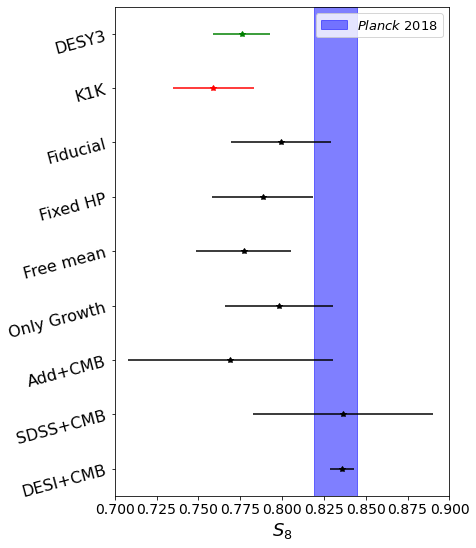

In [11]:
y = [0,2,4,6,8,10,12,14,16]
my_yticks = ['DESY3', 'K1K', 'Fiducial', 'Fixed HP', r'Free mean', r'Only Growth', r'Add+CMB', r'SDSS+CMB', r'DESI+CMB']

S8 = [0.776, 0.759, 
      0.7992495342600935, 0.7884398571886068,  0.7769594719314071,
      0.7980282727699244, 0.7690256125099253, 0.836501722391238 ,
      0.8359636703678847]
S8_err = [0.017, 0.024, 
          0.029819258836656884, 0.03006707009927973, 0.028198532563074703,
          0.03224786296465135, 0.0613422689121348, 0.05364547501445992,
          0.007120492945776052]
    
plt.figure(figsize=(6,9))

plt.xlabel(r'$S_{\rm{8}}$', fontsize=18)

plt.errorbar( S8[0], y[0], xerr=np.transpose(S8_err[0]), fmt='g.')
plt.plot( S8[0], y[0], 'g*')

plt.errorbar( S8[1], y[1], xerr=np.transpose(S8_err[1]), fmt='r.')
plt.plot( S8[1], y[1], 'r*')

plt.errorbar( S8[2:], y[2:], xerr=np.transpose(S8_err[2:]), fmt='k.')
plt.plot( S8[2:], y[2:], 'k*')

plt.axvspan(0.832 - 0.013, 0.832 + 0.013, alpha = 0.5, color='b',  label= r'$Planck$ 2018')

plt.legend(loc = 1, prop={'size': 13})

plt.axis([0.7, 0.9,  y[-1]+1 ,-1,])

plt.yticks(y, my_yticks, fontsize=16)
plt.yticks(rotation=15)

plt.xticks(fontsize=14)

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/S8_comp.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/S8_comp.pdf')

In [15]:
def get_tensions(ref, names, values):
    for i, value in enumerate(values):
        p_mean = ref[0]
        p_sig = ref[1]**(2)
        means = value[0]
        sigs = value[1]**(2)
        tension = np.abs(p_mean-means)/np.sqrt(p_sig + sigs)
        print(names[i], 'vs Planck:', tension)
    return

In [16]:
get_tensions([0.832, 0.013], my_yticks, np.transpose([S8,S8_err]))

DESY3 vs Planck: 2.6167081556895844
K1K vs Planck: 2.674513064882686
Fiducial vs Planck: 1.0067833478851569
Fixed HP vs Planck: 1.3297917216049246
Free mean vs Planck: 1.7725914853784606
Only Growth vs Planck: 0.9770527445924038
Add+CMB vs Planck: 1.0043016091151007
SDSS+CMB vs Planck: 0.08155565875756765
DESI+CMB vs Planck: 0.2674121268647565


In [17]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'n_H': '\eta_H',
               'l_H': 'l_H',
               'n_Xi': '\eta_{Xi}',
               'l_Xi': 'l_{Xi}',
               'H0': 'H_0',
               'H0_gp': 'H_0',
               'omega_m': '\omega_m',
               'omega_m_geo': '\omega_m^{mean}',
               'omega_b': '\omega_b',
               'Omega_m': '\Omega_m',
               'Omega_b': '\Omega_b',
               's80': '\sigma_8',
               'S80': 'S_8',
               'M': 'M'}
names_All = ['n', 'l', 'n_H', 'l_H', 'n_Xi', 'l_Xi',
             'H0', 'H0_gp',  'omega_m', 'omega_m_geo',
             'omega_b', 'Omega_m', 'Omega_b', 's80', 'S80', 'M']
#ranges = {'l':[0.001, 7], 'omega_b': [0.022, 0.023]}
ranges = {'l':[0.001, 7]}

# Triangle Plots

In [18]:
def make_samples(file, names, ranges, label):
    namess = []
    labels = []
    samples = []
    for name in names:
        if name in file.keys():
            namess.append(name) 
            labels.append(labels_dict[name]) 
            samples.append(file[name]) 
        
    return MCSamples(samples=samples, names=namess, labels=labels, label=label, ranges=ranges,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})

In [19]:
All_CMB_gro.files

['z_arr',
 'n',
 'l',
 'DHz',
 'Hz',
 'dMz',
 's8z',
 'fs8z',
 'H0_gp',
 'omega_m',
 'omega_b',
 'rd',
 's80',
 'S80']

In [21]:
WFIRST_CMB_samples = make_samples(WFIRST_CMB, ['n', 'l', 'H0_gp', 'omega_m',  'omega_b'], ranges, 'WFIRST+CMB')
DESI_samples = make_samples(DESI, ['l', 'H0_gp', 'omega_m',  's80', 'S80'], ranges, 'DESI')
DESI_CMB_samples = make_samples(DESI_CMB, ['n', 'l', 'H0_gp', 'omega_m',  'omega_b', 's80', 'S80'], ranges, 'DESI+CMB')
All_samples = make_samples(All, ['l', 'H0', 'omega_b', 'omega_m', 's80', 'S80'], ranges, 'All')
All_CMB_samples = make_samples(All_CMB, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 's80', 'S80'], ranges, 'All+CMB')
All_CMB_hp_samples = make_samples(All_CMB_hp, ['H0_gp', 'omega_b', 'omega_m', 's80', 'S80'],
                                      ranges, 'All+CMB_hp')
All_CMB_fm_samples = make_samples(All_CMB_fm, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 'omega_m_geo', 's80', 'S80'],
                                           ranges, 'All+CMB_fm')
All_CMB_geo_samples = make_samples(All_CMB_geo, ['n', 'l', 'H0_gp', 'omega_b'],
                                           ranges, 'All+CMB_geo')
All_gro_samples = make_samples(All_gro, ['n', 'l', 'H0_gp', 'omega_m', 's80', 'S80'],
                                           ranges, 'All_gro')
All_CMB_gro_samples = make_samples(All_CMB_gro, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 'omega_m_geo', 's80', 'S80'],
                                           ranges, 'All+CMB_gro')
All_CMB_gro_hp_samples = make_samples(All_CMB_gro_hp, ['H0_gp', 'omega_b', 'omega_m', 'omega_m_geo', 's80', 'S80'],
                                           ranges, 'All+CMB_gro_hp')
All_CMB_wmean_samples = MCSamples(samples=[All_CMB_fm['l'], All_CMB_fm['omega_m_geo']], names=['l', 'omega_m'],
                                  labels=['l','\omega_m'],label='All+CMB_geo', ranges=ranges)
All_CMB_Xi_samples = make_samples(All_CMB_Xi, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 's80', 'S80'],
                                      ranges, 'All+CMB_Xi')
All_CMB_Xi_full_samples = make_samples(All_CMB_Xi_full, ['n_H', 'l_H', 'n_Xi', 'l_Xi', 'H0_gp', 'omega_b', 'omega_m', 's80', 'S80'],
                                      ranges, 'All+CMB_Xi_full')
SDSS_samples = make_samples(SDSS, ['n', 'l', 'H0_gp', 'Omega_m', 'Omega_b', 's80', 'S80'], ranges, 'SDSS')
SDSS_CMB_samples = make_samples(SDSS_CMB, ['n', 'l', 'H0_gp', 'omega_m', 'omega_b', 's80', 'S80'], 
                                      ranges, 'SDSS+CMB')
Add_samples = make_samples(Add, ['n', 'l', 'H0_gp', 'Omega_m', 's80', 'S80'], ranges, 'Add')
Add_CMB_samples = make_samples(Add_CMB, ['n', 'l', 'H0_gp', 'omega_m', 'omega_b', 's80', 'S80'], 
                                      ranges, 'Add+CMB')

cosmo1_samples = make_samples(cosmo1, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 's80', 'S80'], ranges, 'cosmo1')
cosmo2_samples = make_samples(cosmo2, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 's80', 'S80'], ranges, 'cosmo2')
cosmo3_samples = make_samples(cosmo3, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 's80', 'S80'], ranges, 'cosmo3')
cosmo4_samples = make_samples(cosmo4, ['n', 'l', 'H0_gp', 'omega_b', 'omega_m', 's80', 'S80'], ranges, 'cosmo4')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


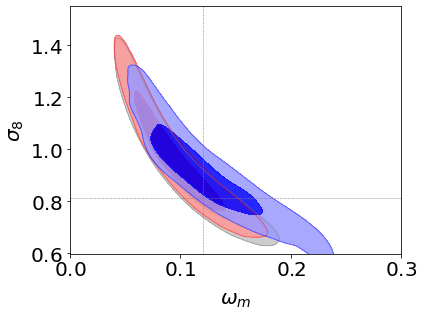

In [17]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([All_CMB_hp_samples,  All_CMB_samples, All_CMB_fm_samples],
          'omega_m', 's80', filled=True,
          colors = ['grey', 'red', 'blue'],
          lims=[0, 0.3, 0.6, 1.55])
g.add_x_marker(0.1202)
g.add_y_marker(0.8120)

g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/banana_test.pdf')

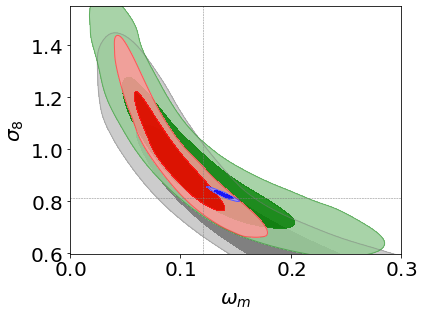

In [18]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([Add_CMB_samples, SDSS_CMB_samples, All_CMB_samples, DESI_CMB_samples],
          'omega_m', 's80', filled=True, 
           colors = ['grey','green', 'red', 'blue'],
           lims=[0, 0.3, 0.6, 1.55], 
           markers={'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                    's80': data_class.cosmo.sigma8()})
g.add_x_marker(0.1202)
g.add_y_marker(0.8120)

g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/banana_data.pdf')

In [19]:
DHz=np.transpose(All_CMB_gro_hp['DHz'])
All_CMB_00_samples = MCSamples(samples=[DHz[0], All_CMB_gro_hp['omega_m']], names=['DHz', 'omega_m'],
                                  labels=['\delta H(z)','\omega_m'],label='z=0', ranges=ranges,
                              settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})
All_CMB_05_samples = MCSamples(samples=[DHz[12], All_CMB_gro_hp['omega_m']], names=['DHz', 'omega_m'],
                                  labels=['\delta H(z)','\omega_m'],label='z=0.5', ranges=ranges,
                              settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})
All_CMB_10_samples = MCSamples(samples=[DHz[20], All_CMB_gro_hp['omega_m']], names=['DHz', 'omega_m'],
                                  labels=['\delta H(z)','\omega_m'],label='z=1.0', ranges=ranges,
                              settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})
All_CMB_15_samples = MCSamples(samples=[DHz[26], All_CMB_gro_hp['omega_m']], names=['DHz', 'omega_m'],
                                  labels=['\delta H(z)','\omega_m'],label='z=1.5', ranges=ranges,
                              settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})
All_CMB_20_samples = MCSamples(samples=[DHz[32], All_CMB_gro_hp['omega_m']], names=['DHz', 'omega_m'],
                                  labels=['\delta H(z)','\omega_m'],label='z=2', ranges=ranges,
                              settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


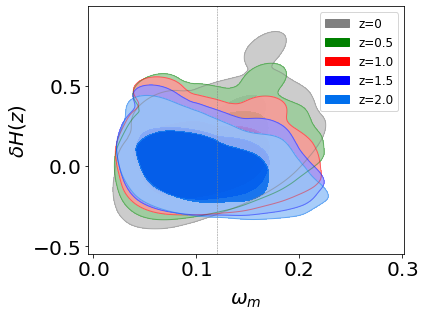

In [20]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([All_CMB_00_samples, All_CMB_05_samples, All_CMB_10_samples, All_CMB_15_samples, All_CMB_20_samples],
          'omega_m', 'DHz', filled=True, 
           colors = ['grey','green', 'red', 'blue'],
           #lims=[0, 0.3, 0.6, 1.55], 
           markers={'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                    's80': data_class.cosmo.sigma8()})
g.add_x_marker(0.1202)
g.add_y_marker(67.67)
g.add_legend(['z=0', 'z=0.5', 'z=1.0','z=1.5', 'z=2.0'])
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/banana_data.pdf')

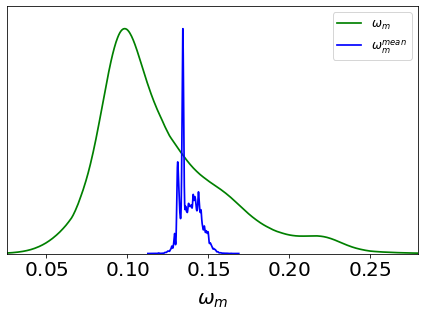

In [21]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d([All_CMB_fm_samples, All_CMB_wmean_samples],'omega_m', 
          colors=['green', 'blue'])
g.add_legend([r'$\omega_m$', r'$\omega_m^{mean}$'])
             
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/geovsgro_1D.pdf')

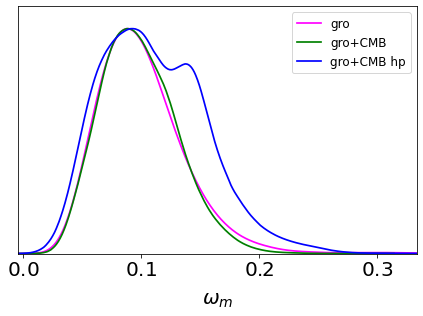

In [22]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_1d([All_gro_samples, All_CMB_gro_samples, All_CMB_gro_hp_samples],'omega_m', 
          colors=['magenta', 'green', 'blue'])
g.add_legend(['gro', 'gro+CMB', 'gro+CMB hp'])
             
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/geovsgro_1D.pdf')

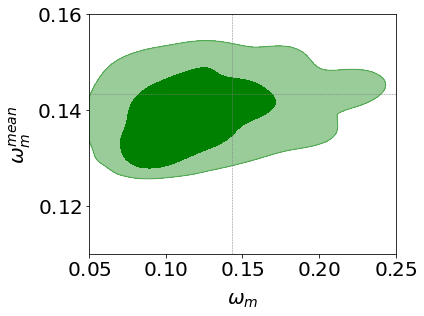

In [23]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([All_CMB_fm_samples],
          'omega_m', 'omega_m_geo', filled=True, 
           colors = ['green'],
           lims=[0.05, 0.25, 0.11, 0.16], 
           markers={'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                    's80': data_class.cosmo.sigma8()})
g.add_x_marker(0.1432)
g.add_y_marker(0.1432)

g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/geovsgro_2D.pdf')

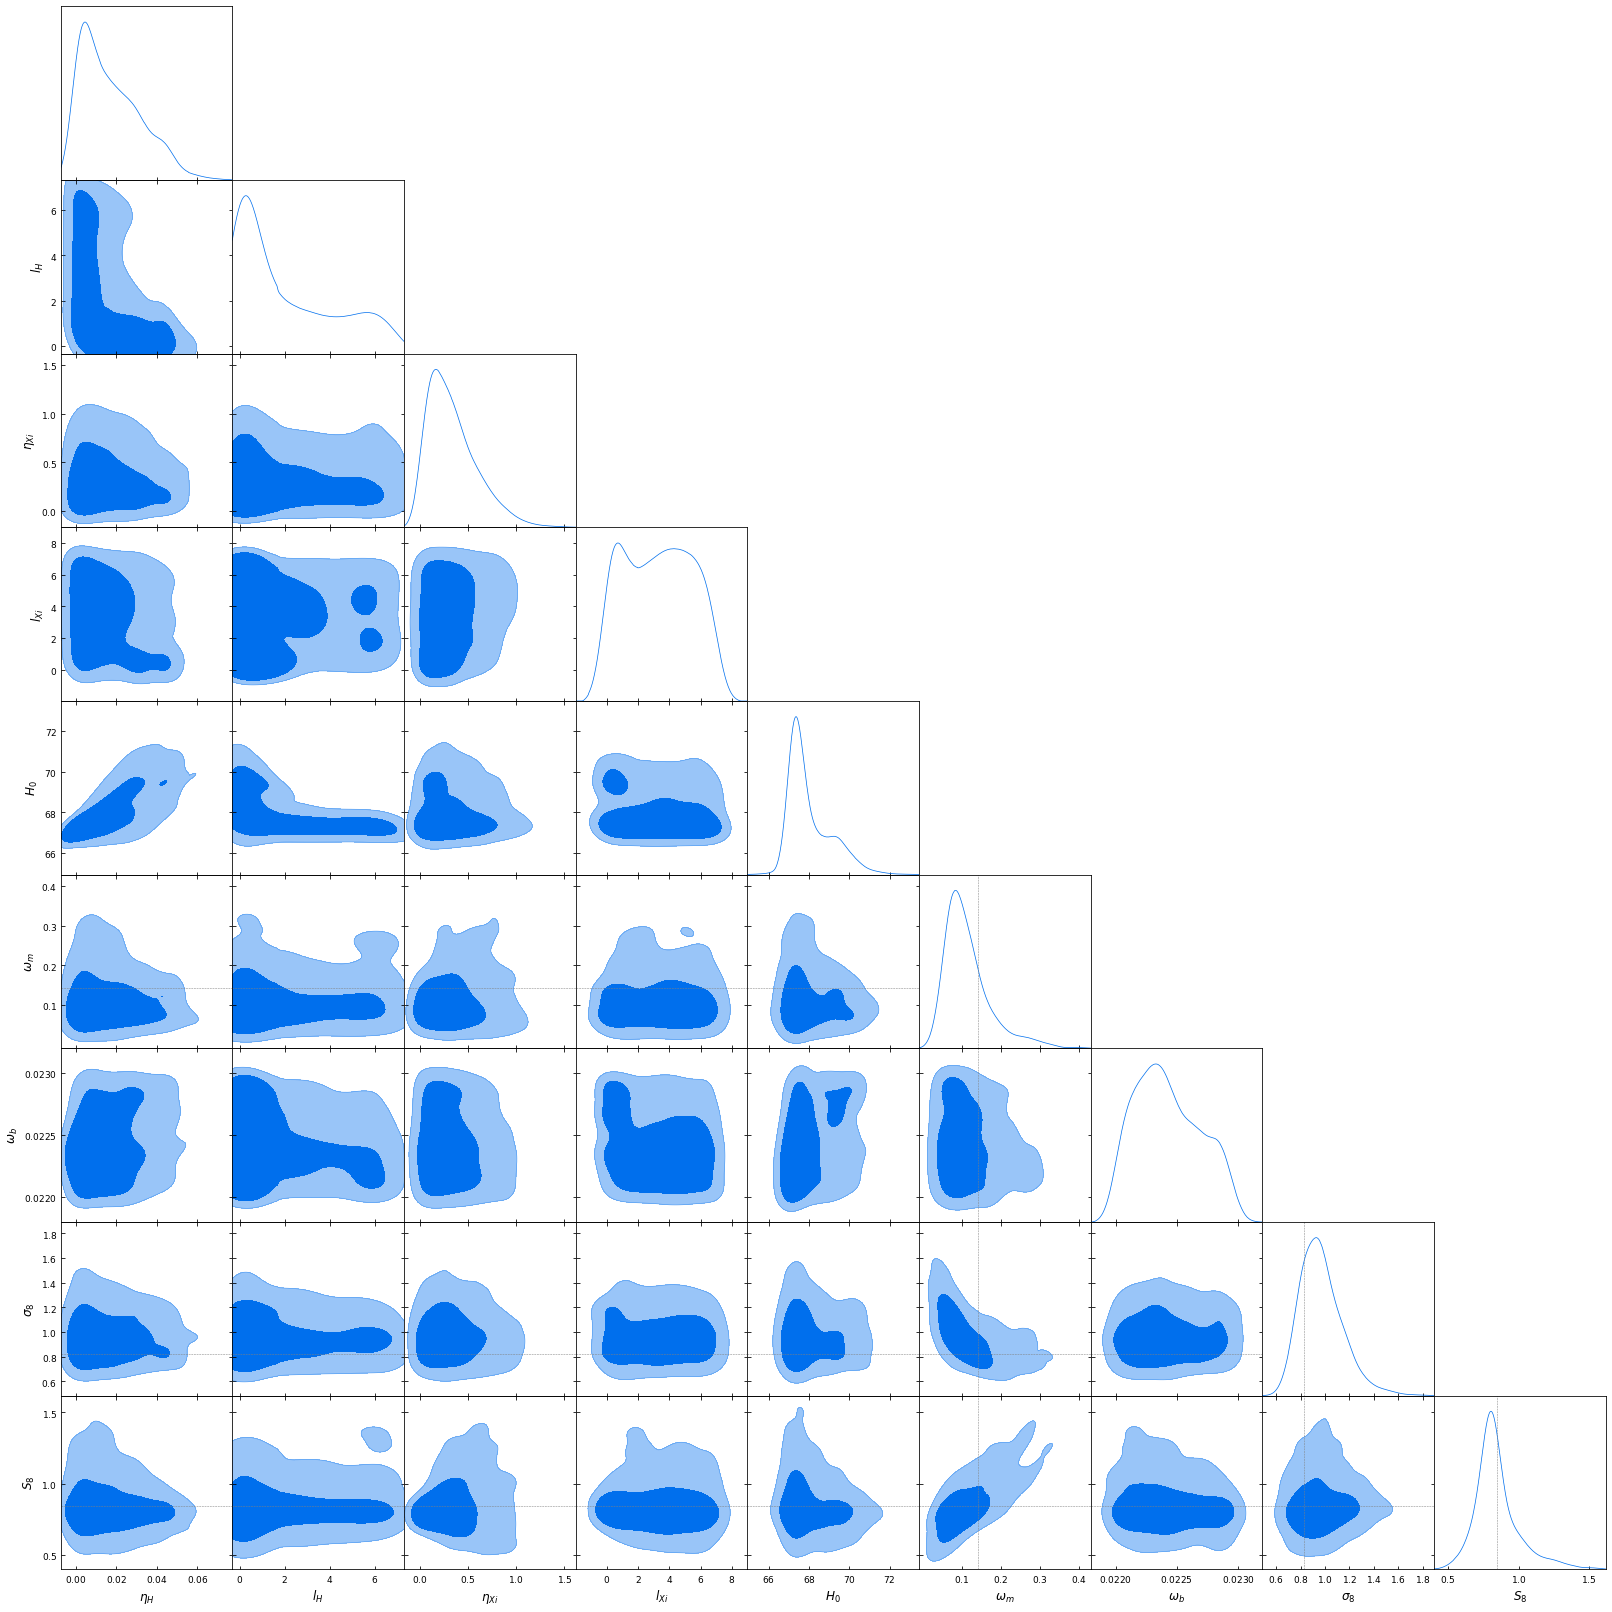

In [24]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([All_CMB_Xi_full_samples],
                ['n_H', 'l_H', 'n_Xi', 'l_Xi', 'H0_gp', 'omega_m', 'omega_b', 's80', 'S80'],
                filled=True,
                markers={'H0':100*data_class.cosmo.h(),
                         'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                         's80': data_class.cosmo.sigma8(), 
                         'S80': data_class.cosmo.sigma8()*np.sqrt(data_class.cosmo.Omega_m()/0.3)})
              
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

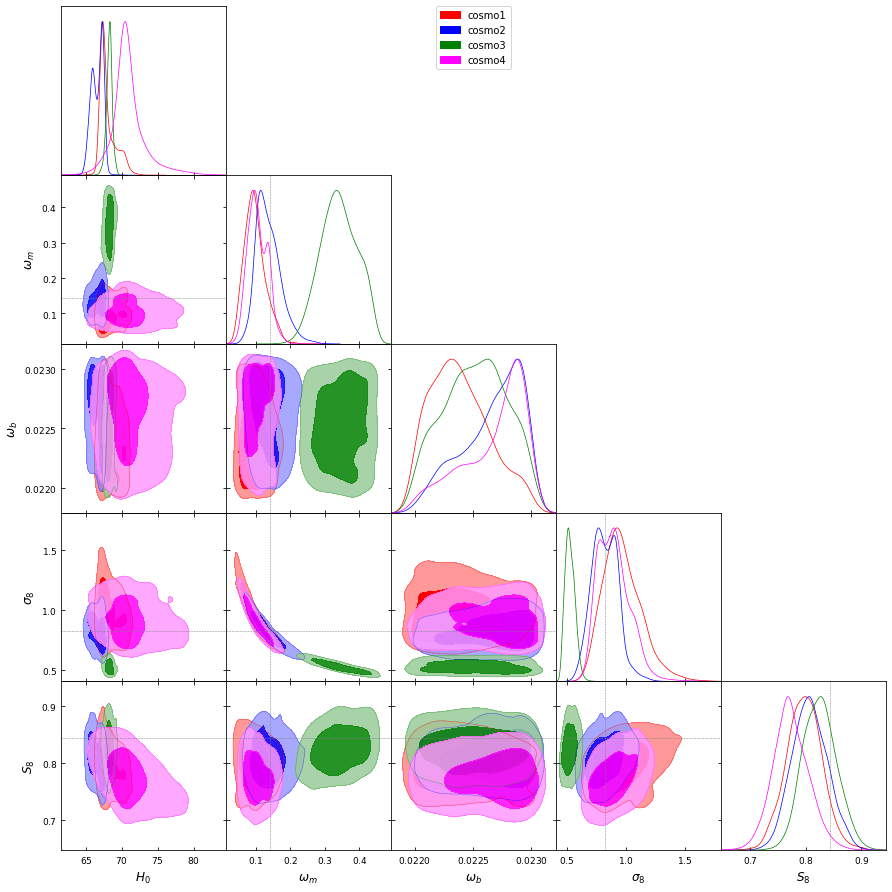

In [50]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([cosmo1_samples, cosmo2_samples, cosmo3_samples,  cosmo4_samples],
                ['H0_gp', 'omega_m', 'omega_b', 's80', 'S80'],
                filled=True,
                colors = ['red', 'blue', 'green', 'magenta'],
                contour_colors = ['red', 'blue', 'green', 'magenta'],
                markers={'H0':100*data_class.cosmo.h(),
                         'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                         's80': data_class.cosmo.sigma8(), 
                         'S80': data_class.cosmo.sigma8()*np.sqrt(data_class.cosmo.Omega_m()/0.3)})
              
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

In [23]:
table_numbers([cosmo1, cosmo2, cosmo3, cosmo4],
              ['cosmo1', 'cosmo2', 'cosmo3',  'cosmo4'])

cosmo1
H0 68.02998972501466 +/- 1.146292106197964
S80 0.7970290170509826 +/- 0.03133758297413431
s80 0.9708776173571869 +/- 0.1622469811918684
wm0 0.09804462762839708 +/- 0.029594203084593047
-----
cosmo2
H0 66.5760090505596 +/- 0.7871825685427813
S80 0.8072532634964323 +/- 0.03113719899057822
s80 0.8219409988047444 +/- 0.10807050018817857
wm0 0.1370253275552228 +/- 0.03500111187671322
-----
cosmo3
H0 68.25197847157615 +/- 0.4125542515478483
S80 0.8250079339215485 +/- 0.029691691241644457
s80 0.5243011614014008 +/- 0.04109122391673338
wm0 0.34126491596130604 +/- 0.051615385929372586
-----
cosmo4
H0 70.93792300886885 +/- 2.3666164726747208
S80 0.7732876395485039 +/- 0.03178558289520174
s80 0.8980822007890866 +/- 0.13473850888146377
wm0 0.10606958552368338 +/- 0.027316106148437325
-----


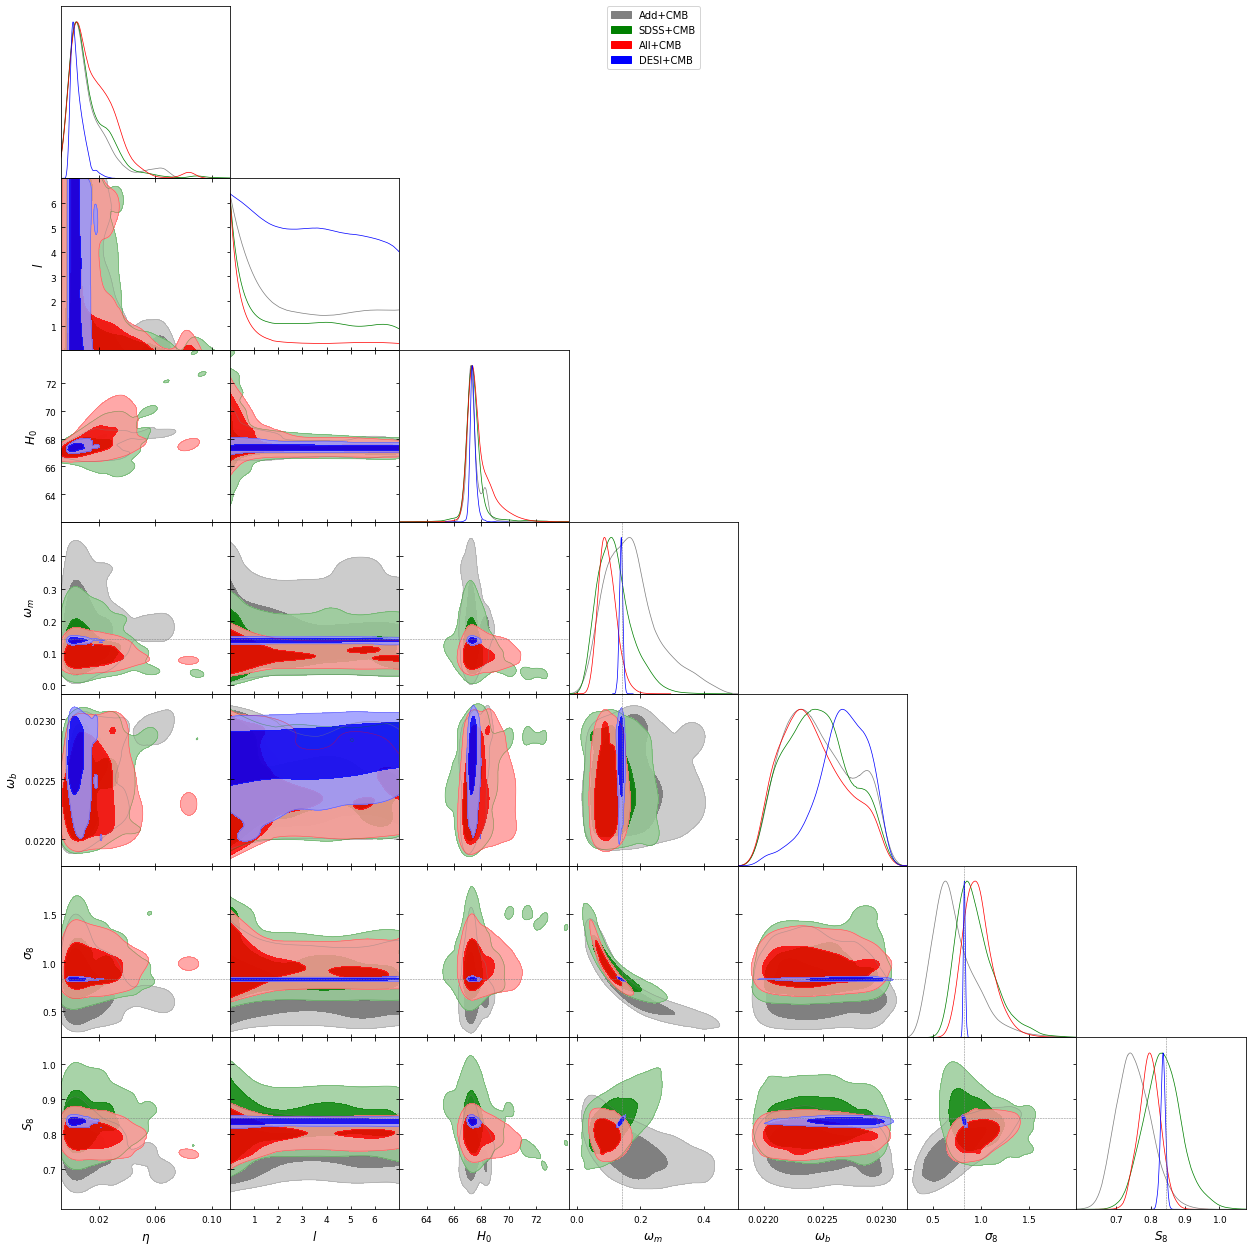

In [25]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([Add_CMB_samples,  SDSS_CMB_samples, All_CMB_samples, DESI_CMB_samples],
                ['n', 'l', 'H0_gp', 'omega_m', 'omega_b', 's80', 'S80'],
                filled=True,
                colors = ['grey', 'green', 'red', 'blue'],
                contour_colors = ['grey', 'green', 'red', 'blue'],
                markers={'H0':100*data_class.cosmo.h(),
                         'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                         's80': data_class.cosmo.sigma8(), 
                         'S80': data_class.cosmo.sigma8()*np.sqrt(data_class.cosmo.Omega_m()/0.3)})
              
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

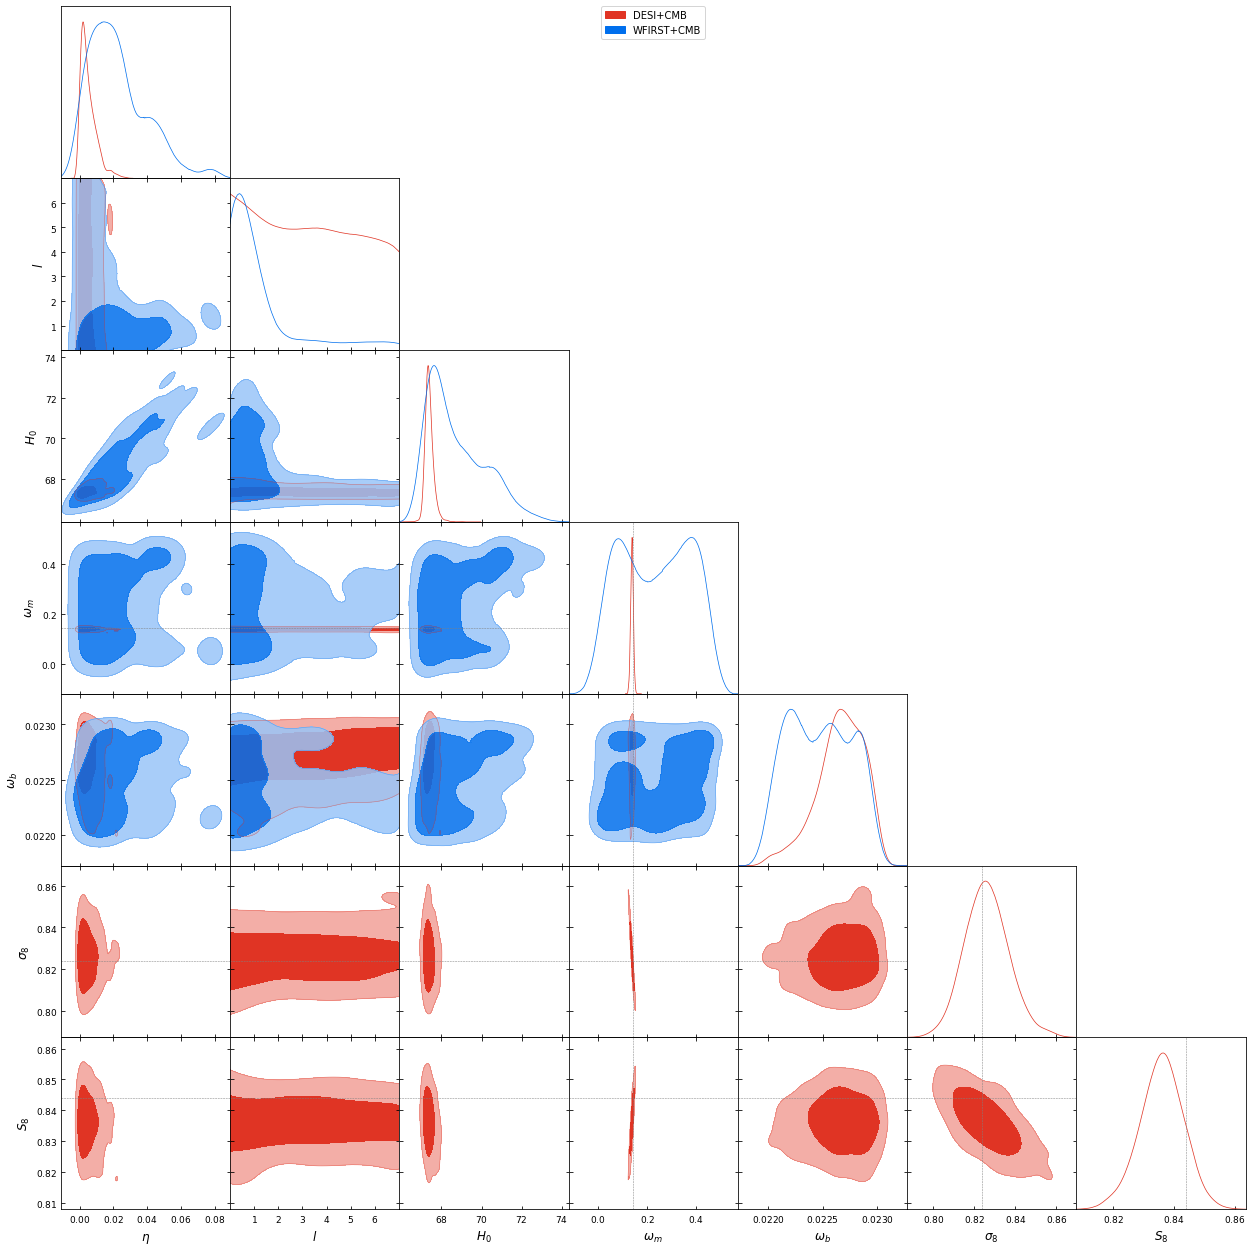

In [26]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DESI_CMB_samples, WFIRST_CMB_samples],
                ['n', 'l', 'H0_gp', 'omega_m', 'omega_b', 's80', 'S80'],
                filled=True,
                markers={'H0':100*data_class.cosmo.h(),
                         'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                         's80': data_class.cosmo.sigma8(), 
                         'S80': data_class.cosmo.sigma8()*np.sqrt(data_class.cosmo.Omega_m()/0.3)})
                
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_forecast.pdf')

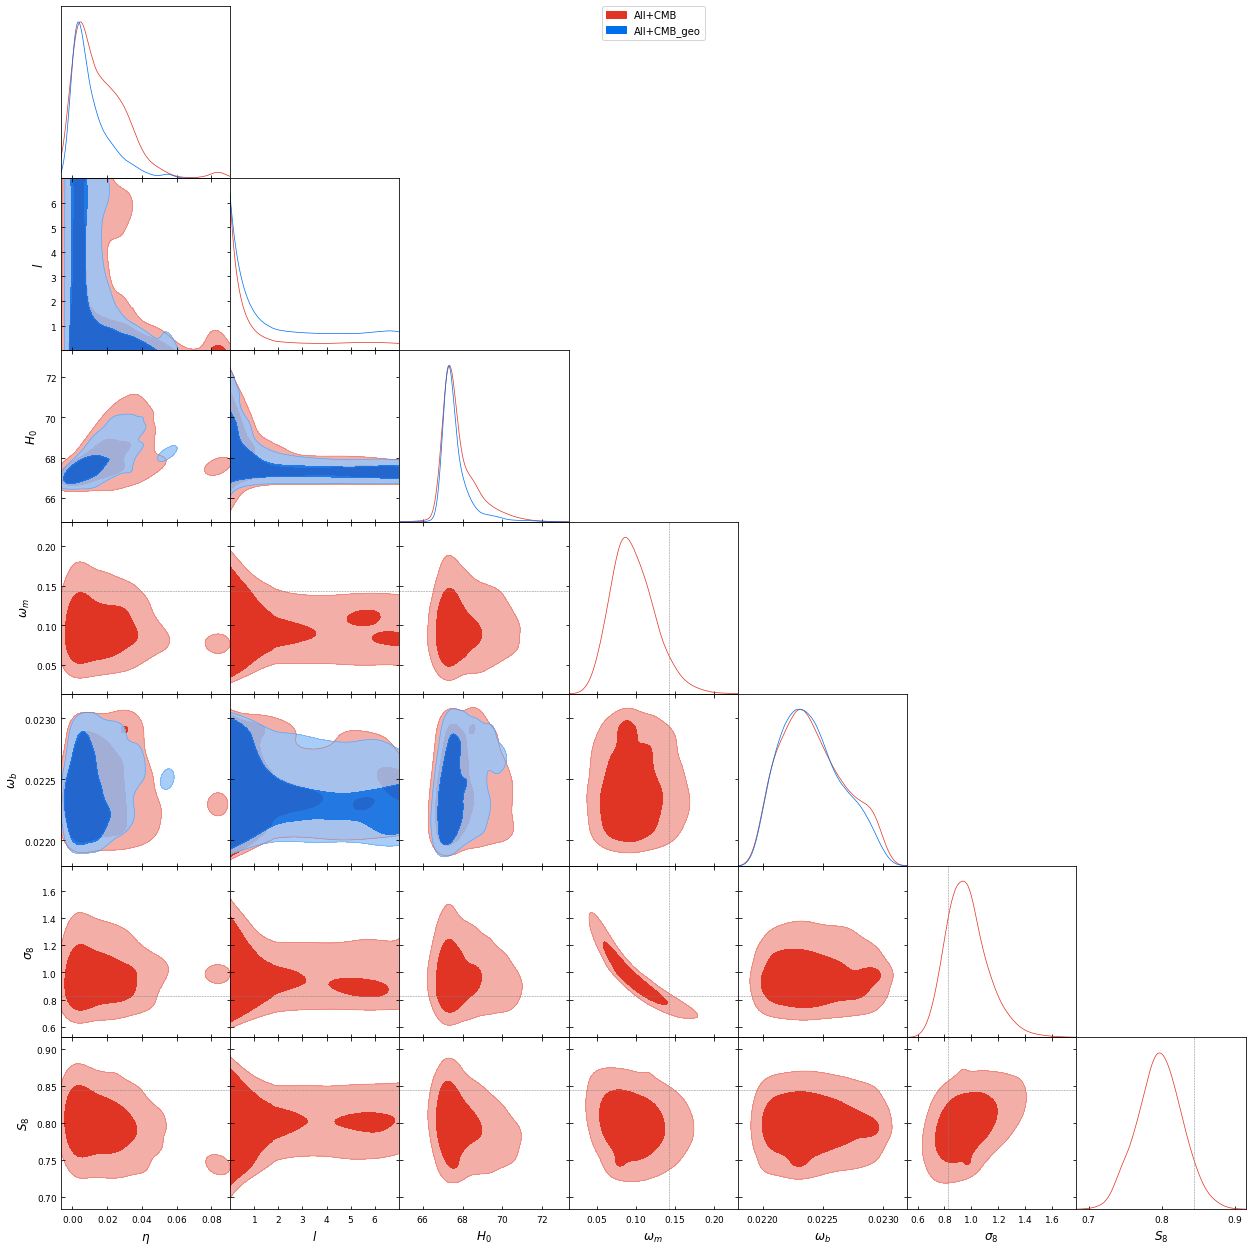

In [72]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ All_CMB_samples,All_CMB_geo_samples],
                ['n', 'l', 'H0_gp', 'omega_m', 'omega_b', 's80', 'S80'],
                filled=True,
                markers={'H0':100*data_class.cosmo.h(),
                         'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                         's80': data_class.cosmo.sigma8(), 
                         'S80': data_class.cosmo.sigma8()*np.sqrt(data_class.cosmo.Omega_m()/0.3)})
                
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_forecast.pdf')

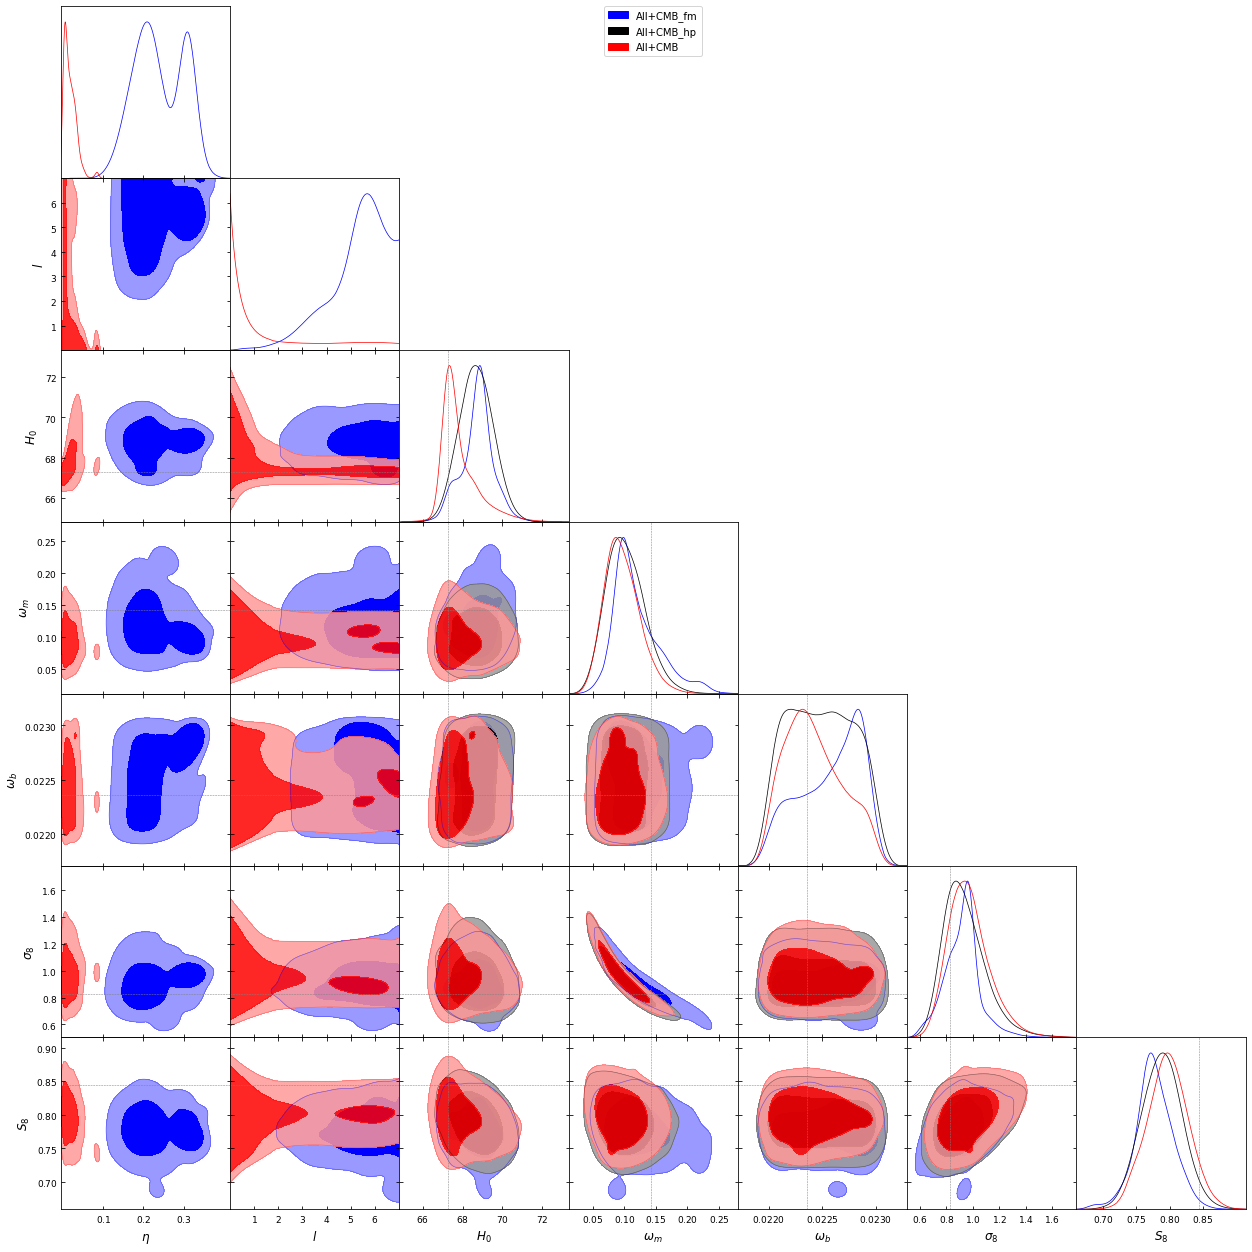

In [28]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([ All_CMB_fm_samples, All_CMB_hp_samples, All_CMB_samples],
                ['n', 'l', 'H0_gp', 'omega_m', 'omega_b', 's80', 'S80'],
                colors = ['blue', 'black',  'red'],
                contour_colors = ['blue', 'black', 'red'],
                filled=True,
                markers={'H0_gp':100*data_class.cosmo.h(),
                         'Omega_m': data_class.cosmo.Omega_m(),
                         'Omega_b': data_class.cosmo.Omega_b(),
                         'omega_m': data_class.cosmo.Omega_m()*data_class.cosmo.h()**2,
                         'omega_b': data_class.cosmo.Omega_b()*data_class.cosmo.h()**2,
                         'Omega_L': data_class.cosmo.Omega_Lambda(),
                         's80': data_class.cosmo.sigma8(), 
                         'S80': data_class.cosmo.sigma8()*np.sqrt(data_class.cosmo.Omega_m()/0.3)})

g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_tests.pdf')

# Xi

In [29]:
dXi_All_CMB_Xi_m, dXi_All_CMB_Xi_s = get_m_s(1+All_CMB_Xi['DXiz'])
dXi_All_CMB_Xi_wm_m, dXi_All_CMB_Xi_wm_s = get_m_s(1+All_CMB_Xi_wm['DXiz'])
dXi_All_CMB_Xi_full_m, dXi_All_CMB_Xi_full_s = get_m_s(1+All_CMB_Xi_full['DXiz'])

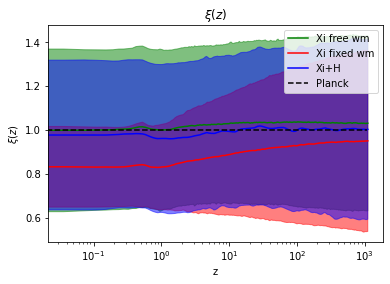

In [30]:
plt.plot(z_arr,  dXi_All_CMB_Xi_m, color ='g', label='Xi free wm')
plt.fill_between(z_arr, dXi_All_CMB_Xi_m+dXi_All_CMB_Xi_s,
                 dXi_All_CMB_Xi_m-dXi_All_CMB_Xi_s, color='g', alpha=.5)
plt.plot(z_arr,  dXi_All_CMB_Xi_wm_m, color ='r', label='Xi fixed wm')
plt.fill_between(z_arr, dXi_All_CMB_Xi_wm_m+dXi_All_CMB_Xi_wm_s,
                 dXi_All_CMB_Xi_wm_m-dXi_All_CMB_Xi_wm_s, color='r', alpha=.5)
plt.plot(z_arr,  dXi_All_CMB_Xi_full_m, color ='b', label='Xi+H')
plt.fill_between(z_arr, dXi_All_CMB_Xi_full_m+dXi_All_CMB_Xi_full_s,
                 dXi_All_CMB_Xi_full_m-dXi_All_CMB_Xi_full_s, color='b', alpha=.5)


plt.plot(z_planck, np.ones_like(z_planck), 'k--', label='Planck')

plt.xscale('log')
plt.xlabel("z")
plt.ylabel(r"$ \xi(z)$")
plt.title(r"$\xi(z)$")
plt.legend();

# d_H gp 

In [43]:
dH_DESI_CMB_m, dH_DESI_CMB_s = get_m_s(DESI_CMB['DHz'])
dH_WFIRST_CMB_m, dH_WFIRST_CMB_s = get_m_s(WFIRST_CMB['DHz'])
dH_All_m, dH_All_s = get_m_s(All['DHz'])
dH_All_gro_m, dH_All_gro_s = get_m_s(All_gro['DHz'])
dH_All_CMB_m, dH_All_CMB_s = get_m_s(All_CMB['DHz'])
dH_All_CMB_nowm_m, dH_All_CMB_nowm_s = get_m_s(All_CMB_nowm['DHz'])
dH_All_CMB_hp_m, dH_All_CMB_hp_s = get_m_s(All_CMB_hp['DHz'])
dH_All_CMB_fm_m, dH_All_CMB_fm_s = get_m_s(All_CMB_fm['DHz'])
dH_All_CMB_geo_m, dH_All_CMB_geo_s = get_m_s(All_CMB_geo['DHz'])
dH_All_CMB_gro_m, dH_All_CMB_gro_s = get_m_s(All_CMB_gro['DHz'])
dH_All_CMB_gro_hp_m, dH_All_CMB_gro_hp_s = get_m_s(All_CMB_gro_hp['DHz'])
dH_All_CMB_geo_hp_m, dH_All_CMB_geo_hp_s = get_m_s(All_CMB_geo_hp['DHz'])
dH_All_CMB_Xi_full_m, dH_All_CMB_Xi_full_s = get_m_s(All_CMB_Xi_full['DHz'])
dH_SDSS_m, dH_SDSS_s = get_m_s(SDSS['DHz'])
dH_SDSS_CMB_m, dH_SDSS_CMB_s = get_m_s(SDSS_CMB['DHz'])
dH_Add_m, dH_Add_s = get_m_s(Add['DHz'])
dH_Add_CMB_m, dH_Add_CMB_s = get_m_s(Add_CMB['DHz'])

dH_cosmo1_m, dH_cosmo1_s = get_m_s(cosmo1['DHz'])
dH_cosmo2_m, dH_cosmo2_s = get_m_s(cosmo2['DHz'])
dH_cosmo3_m, dH_cosmo3_s = get_m_s(cosmo3['DHz'])
dH_cosmo4_m, dH_cosmo4_s = get_m_s(cosmo4['DHz'])

Planck = data_class.Planck
z_planck = data_class.z_planck

<ipython-input-44-688c17467d20>:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


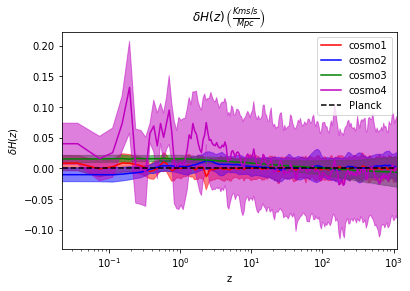

In [44]:
plt.plot(z_arr,  dH_cosmo1_m, color ='r', label='cosmo1')
plt.fill_between(z_arr, dH_cosmo1_m+dH_cosmo1_s,
                 dH_cosmo1_m-dH_cosmo1_s, color='r', alpha=.5)

plt.plot(z_arr,  dH_cosmo2_m, color ='b', label='cosmo2')
plt.fill_between(z_arr, dH_cosmo2_m+dH_cosmo2_s,
                 dH_cosmo2_m-dH_cosmo2_s, color='b', alpha=.5)

plt.plot(z_arr,  dH_cosmo3_m, color ='g', label='cosmo3')
plt.fill_between(z_arr, dH_cosmo3_m+dH_cosmo3_s,
                 dH_cosmo3_m-dH_cosmo3_s, color='g', alpha=.5)

plt.plot(z_arr,  dH_cosmo4_m, color ='m', label='cosmo4')
plt.fill_between(z_arr, dH_cosmo4_m+dH_cosmo4_s,
                 dH_cosmo4_m-dH_cosmo4_s, color='m', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')


plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_tests.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_tests.pdf')  

<ipython-input-32-ddd4e7572890>:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


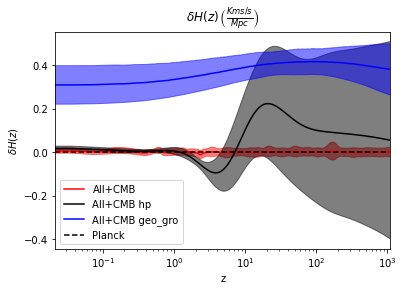

In [32]:
plt.plot(z_arr,  dH_All_CMB_m, color ='r', label='All+CMB')
plt.fill_between(z_arr, dH_All_CMB_m+dH_All_CMB_s,
                 dH_All_CMB_m-dH_All_CMB_s, color='r', alpha=.5)

plt.plot(z_arr,  dH_All_CMB_hp_m, color ='k', label='All+CMB hp')
plt.fill_between(z_arr, dH_All_CMB_hp_m+dH_All_CMB_hp_s,
                 dH_All_CMB_hp_m-dH_All_CMB_hp_s, color='k', alpha=.5)

plt.plot(z_arr,  dH_All_CMB_fm_m, color ='b', label='All+CMB geo_gro')
plt.fill_between(z_arr, dH_All_CMB_fm_m+dH_All_CMB_fm_s,
                 dH_All_CMB_fm_m-dH_All_CMB_fm_s, color='b', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')


plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_tests.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_tests.pdf')  

<ipython-input-33-2d1024bc996d>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


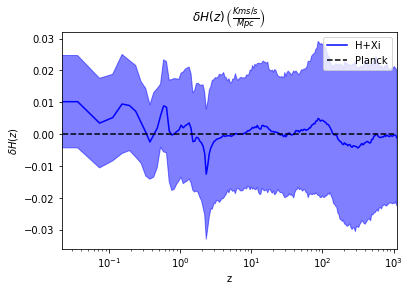

In [33]:
plt.plot(z_arr,  dH_All_CMB_Xi_full_m, color ='b', label='H+Xi ')
plt.fill_between(z_arr, dH_All_CMB_Xi_full_m+dH_All_CMB_Xi_full_s,
                 dH_All_CMB_Xi_full_m-dH_All_CMB_Xi_full_s, color='b', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')


plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_tests.pdf')
#plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_tests.pdf')  

<ipython-input-34-62cc4f9ab853>:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(z_arr, dH_SDSS_CMB_m+dH_SDSS_CMB_s,
<ipython-input-34-62cc4f9ab853>:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


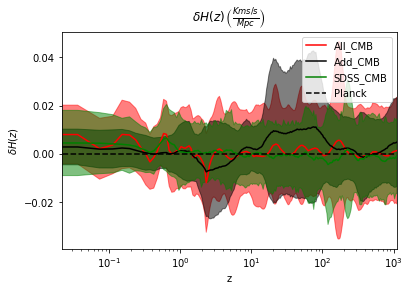

In [34]:
plt.plot(z_arr,  dH_All_CMB_m, color ='r', label='All_CMB')
plt.fill_between(z_arr, dH_All_CMB_m+dH_All_CMB_s,
                 dH_All_CMB_m-dH_All_CMB_s, color='r', alpha=.5)

plt.plot(z_arr,  dH_Add_CMB_m, color ='k', label='Add_CMB')
plt.fill_between(z_arr, dH_Add_CMB_m+dH_Add_CMB_s,
                 dH_Add_CMB_m-dH_Add_CMB_s, color='k', alpha=.5)

plt.plot(z_arr,  dH_SDSS_CMB_m, color ='g', label='SDSS_CMB')
plt.fill_between(z_arr, dH_SDSS_CMB_m+dH_SDSS_CMB_s,
                 dH_SDSS_CMB_m-dH_SDSS_CMB_s, color='gk', alpha=.5)

#plt.plot(z_arr,  dH_DESI_CMB_m, color ='b', label='DESI_CMB')
#plt.fill_between(z_arr, dH_DESI_CMB_m+dH_DESI_CMB_s,
#                 dH_DESI_CMB_m-dH_DESI_CMB_s, color='b', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')

plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')  

<ipython-input-51-4a2b527f2a81>:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


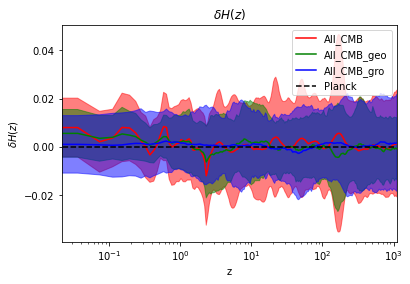

In [51]:
plt.plot(z_arr,  dH_All_CMB_m, color ='r', label='All_CMB')
plt.fill_between(z_arr, dH_All_CMB_m+dH_All_CMB_s,
                 dH_All_CMB_m-dH_All_CMB_s, color='r', alpha=.5)

#plt.plot(z_arr,  dH_All_gro_m, color ='m', label='All_gro')
#plt.fill_between(z_arr, dH_All_gro_m+dH_All_gro_s,
#                 dH_All_gro_m-dH_All_gro_s, color='m', alpha=.5)

plt.plot(z_arr,  dH_All_CMB_geo_m, color ='g', label='All_CMB_geo')
plt.fill_between(z_arr, dH_All_CMB_geo_m+dH_All_CMB_geo_s,
                 dH_All_CMB_geo_m-dH_All_CMB_geo_s, color='g', alpha=.5)

plt.plot(z_arr,  dH_All_CMB_gro_m, color ='b', label='All_CMB_gro')
plt.fill_between(z_arr, dH_All_CMB_gro_m+dH_All_CMB_gro_s,
                 dH_All_CMB_gro_m-dH_All_CMB_gro_s, color='b', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')

plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')  

<ipython-input-32-89096ad8a267>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


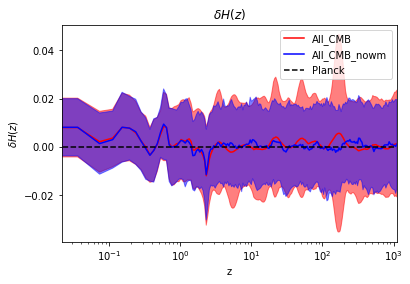

In [32]:
plt.plot(z_arr,  dH_All_CMB_m, color ='r', label='All_CMB')
plt.fill_between(z_arr, dH_All_CMB_m+dH_All_CMB_s,
                 dH_All_CMB_m-dH_All_CMB_s, color='r', alpha=.5)

plt.plot(z_arr,  dH_All_CMB_nowm_m, color ='b', label='All_CMB_nowm')
plt.fill_between(z_arr, dH_All_CMB_nowm_m+dH_All_CMB_nowm_s,
                 dH_All_CMB_nowm_m-dH_All_CMB_nowm_s, color='b', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')

plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')  

<ipython-input-27-71e2c8bcecca>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


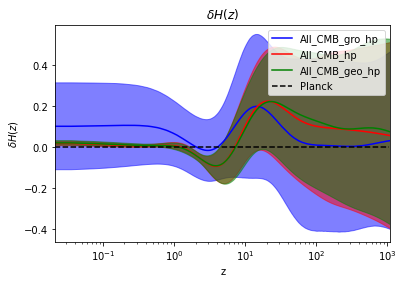

In [27]:
plt.plot(z_arr,  dH_All_CMB_gro_hp_m, color ='b', label='All_CMB_gro_hp')
plt.fill_between(z_arr, dH_All_CMB_gro_hp_m+dH_All_CMB_gro_hp_s,
                 dH_All_CMB_gro_hp_m-dH_All_CMB_gro_hp_s, color='b', alpha=.5)

plt.plot(z_arr,  dH_All_CMB_hp_m, color ='r', label='All_CMB_hp')
plt.fill_between(z_arr, dH_All_CMB_hp_m+dH_All_CMB_hp_s,
                 dH_All_CMB_hp_m-dH_All_CMB_hp_s, color='r', alpha=.5)

plt.plot(z_arr,  dH_All_CMB_geo_hp_m, color ='g', label='All_CMB_geo_hp')
plt.fill_between(z_arr, dH_All_CMB_geo_hp_m+dH_All_CMB_geo_hp_s,
                 dH_All_CMB_geo_hp_m-dH_All_CMB_geo_hp_s, color='g', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')

plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_data.pdf')  

In [52]:
print('Geo+Gro: ', np.mean(dH_All_CMB_s), '+/-', np.std(dH_All_CMB_s))
print('Geo: ', np.mean(dH_All_CMB_geo_s), '+/-', np.std(dH_All_CMB_geo_s))
print('Gro: ', np.mean(dH_All_gro_s), '+/-', np.std(dH_All_gro_s))
print('Geo+Gro hp: ', np.mean(dH_All_CMB_hp_s), '+/-', np.std(dH_All_CMB_hp_s))
print('Geo hp:', np.mean(dH_All_CMB_geo_hp_s), '+/-', np.std(dH_All_CMB_geo_hp_s))
print('Gro+CMB hp:', np.mean(dH_All_CMB_gro_hp_s), '+/-', np.std(dH_All_CMB_gro_hp_s))

Geo+Gro:  0.01987110220883702 +/- 0.0046378140768584646
Geo:  0.013809026147062937 +/- 0.0028745064748239213
Gro:  0.4142784739912081 +/- 0.005480958555953558
Geo+Gro hp:  0.23974963267463437 +/- 0.14875975926786944
Geo hp: 0.23675816533446295 +/- 0.14672729912429705
Gro+CMB hp: 0.32166599423531705 +/- 0.10331009655002495


<ipython-input-53-28ecf6274a6c>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1100)


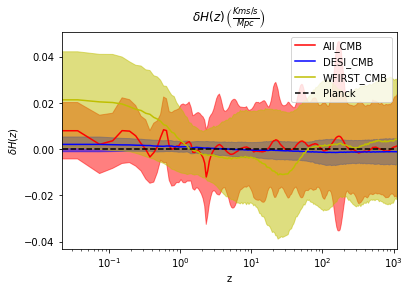

In [53]:
plt.plot(z_arr,  dH_All_CMB_m, color ='r', label='All_CMB')
plt.fill_between(z_arr, dH_All_CMB_m+dH_All_CMB_s,
                 dH_All_CMB_m-dH_All_CMB_s, color='r', alpha=.5)

plt.plot(z_arr,  dH_DESI_CMB_m, color ='b', label='DESI_CMB')
plt.fill_between(z_arr, dH_DESI_CMB_m+dH_DESI_CMB_s,
                 dH_DESI_CMB_m-dH_DESI_CMB_s, color='b', alpha=.5)

plt.plot(z_arr,  dH_WFIRST_CMB_m, color ='y', label='WFIRST_CMB')
plt.fill_between(z_arr, dH_WFIRST_CMB_m+dH_WFIRST_CMB_s,
                 dH_WFIRST_CMB_m-dH_WFIRST_CMB_s, color='y', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')

plt.xscale('log')
plt.xlim(0, 1100)
plt.xlabel("z")
plt.ylabel(r"$ \delta H(z)$")
plt.title(r"$\delta H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_forecast.pdf')
#plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/dH_gp_forecast.pdf')  

In [57]:
print('Current: ', np.mean(dH_All_CMB_s), '+/-', np.std(dH_All_CMB_s))
print('DESI: ', np.mean(dH_DESI_CMB_s), '+/-', np.std(dH_DESI_CMB_s))
print('WFIRST: ', np.mean(dH_WFIRST_CMB_s), '+/-', np.std(dH_WFIRST_CMB_s))

Current:  0.01987110220883702 +/- 0.0046378140768584646
DESI:  0.00403858729026612 +/- 0.0011004063459458579
WFIRST:  0.021896868761442364 +/- 0.005056885459412922


# H gp 

In [46]:
H_DESI_m, H_DESI_s = get_m_s(DESI['Hz'])
H_DESI_CMB_m, H_DESI_CMB_s = get_m_s(DESI_CMB['Hz'])
H_WFIRST_CMB_m, H_WFIRST_CMB_s = get_m_s(WFIRST_CMB['Hz'])
H_All_m, H_All_s = get_m_s(All['Hz'])
H_All_CMB_m, H_All_CMB_s = get_m_s(All_CMB['Hz'])
H_All_CMB_hp_m, H_All_CMB_hp_s = get_m_s(All_CMB_hp['Hz'])
H_All_CMB_fm_m, H_All_CMB_fm_s = get_m_s(All_CMB_fm['Hz'])
H_All_CMB_geo_m, H_All_CMB_geo_s = get_m_s(All_CMB_geo['Hz'])
H_All_CMB_gro_m, H_All_CMB_gro_s = get_m_s(All_CMB_gro['Hz'])
H_All_CMB_Xi_full_m, H_All_CMB_Xi_full_s = get_m_s(All_CMB_Xi_full['Hz'])
H_SDSS_m, H_SDSS_s = get_m_s(SDSS['Hz'])
H_SDSS_CMB_m, H_SDSS_CMB_s = get_m_s(SDSS_CMB['Hz'])
H_Add_m, H_Add_s = get_m_s(Add['Hz'])
H_Add_CMB_m, H_Add_CMB_s = get_m_s(Add_CMB['Hz'])

H_cosmo1_m, H_cosmo1_s = get_m_s(cosmo1['Hz'])
H_cosmo2_m, H_cosmo2_s = get_m_s(cosmo2['Hz'])
H_cosmo3_m, H_cosmo3_s = get_m_s(cosmo3['Hz'])
H_cosmo4_m, H_cosmo4_s = get_m_s(cosmo4['Hz'])

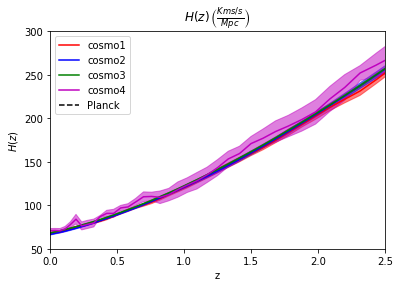

In [49]:
plt.plot(z_arr,  H_cosmo1_m, color ='r', label='cosmo1')
plt.fill_between(z_arr, H_cosmo1_m+H_cosmo1_s,
                 H_cosmo1_m-H_cosmo1_s, color='r', alpha=.5)

plt.plot(z_arr,  H_cosmo2_m, color ='b', label='cosmo2')
plt.fill_between(z_arr, H_cosmo2_m+H_cosmo2_s,
                 H_cosmo2_m-H_cosmo2_s, color='b', alpha=.5)

plt.plot(z_arr,  H_cosmo3_m, color ='g', label='cosmo3')
plt.fill_between(z_arr, H_cosmo3_m+H_cosmo3_s,
                 H_cosmo3_m-H_cosmo3_s, color='g', alpha=.5)

plt.plot(z_arr,  H_cosmo4_m, color ='m', label='cosmo4')
plt.fill_between(z_arr, H_cosmo4_m+H_cosmo4_s,
                 H_cosmo4_m-H_cosmo4_s, color='m', alpha=.5)

plt.plot(z_planck, np.zeros_like(z_planck), 'k--', label='Planck')


plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

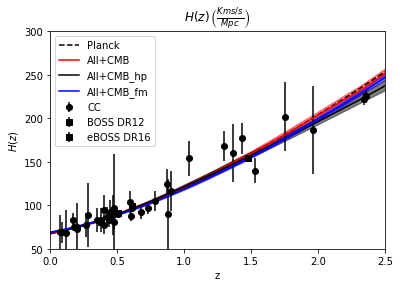

In [41]:
plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.errorbar(CC_data['z'], CC_data['data'], yerr = CC_data['err'], fmt='ko', label='CC')
plt.errorbar(BOSS_data['z'], BOSS_data['para_data'], yerr=BOSS_data['para_err'], fmt='ks', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], c/1000/(eBOSS_data['para_data']*eBOSS_data['rd']), 
             yerr = 1/eBOSS_data['rd']/(np.array([0.47])), fmt='ks', label='eBOSS DR16')

plt.plot(z_arr,  H_All_CMB_m, color ='r', label='All+CMB')
plt.fill_between(z_arr, H_All_CMB_m+H_All_CMB_s, H_All_CMB_m-H_All_CMB_s, color='r', alpha=.5)
plt.plot(z_arr,  H_All_CMB_hp_m, color ='k', label='All+CMB_hp')
plt.fill_between(z_arr, H_All_CMB_hp_m+H_All_CMB_hp_s,
                 H_All_CMB_hp_m-H_All_CMB_hp_s, color='k', alpha=.5)
plt.plot(z_arr,  H_All_CMB_fm_m, color ='b', label='All+CMB_fm')
plt.fill_between(z_arr, H_All_CMB_fm_m+H_All_CMB_fm_s,
                 H_All_CMB_fm_m-H_All_CMB_fm_s, color='b', alpha=.5)
#plt.plot(z_arr,  H_All_CMB_full_m, color ='g', label='All+CMB_full Data')
#plt.fill_between(z_arr, H_All_CMB_full_m+H_All_CMB_full_s,
#                 H_All_CMB_full_m-H_All_CMB_full_s, color='g', alpha=.5)


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_tests.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_tests.pdf')  

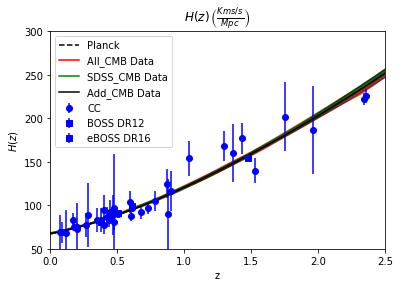

In [42]:
plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.errorbar(CC_data['z'], CC_data['data'], yerr = CC_data['err'], fmt='bo', label='CC')
plt.errorbar(BOSS_data['z'], BOSS_data['para_data'], yerr=BOSS_data['para_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], c/1000/(eBOSS_data['para_data']*eBOSS_data['rd']), 
             yerr = 1/eBOSS_data['rd']/(np.array([0.47])), fmt='bs', label='eBOSS DR16')

plt.plot(z_arr,  H_All_CMB_m, color ='r', label='All_CMB Data')
plt.fill_between(z_arr, H_All_CMB_m+H_All_CMB_s,
                 H_All_CMB_m-H_All_CMB_s, color='r', alpha=.5)

plt.plot(z_arr,  H_SDSS_CMB_m, color ='g', label='SDSS_CMB Data')
plt.fill_between(z_arr, H_SDSS_CMB_m+H_SDSS_CMB_s, 
                 H_SDSS_CMB_m-H_SDSS_CMB_s, color='g', alpha=.5)

plt.plot(z_arr,  H_Add_CMB_m, color ='k', label='Add_CMB Data')
plt.fill_between(z_arr, H_Add_CMB_m+H_Add_CMB_s,
                 H_Add_CMB_m-H_Add_CMB_s, color='k', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

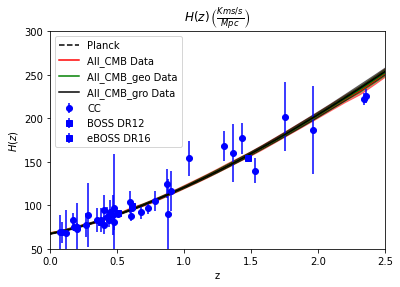

In [43]:
plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.errorbar(CC_data['z'], CC_data['data'], yerr = CC_data['err'], fmt='bo', label='CC')
plt.errorbar(BOSS_data['z'], BOSS_data['para_data'], yerr=BOSS_data['para_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], c/1000/(eBOSS_data['para_data']*eBOSS_data['rd']), 
             yerr = 1/eBOSS_data['rd']/(np.array([0.47])), fmt='bs', label='eBOSS DR16')

plt.plot(z_arr,  H_All_CMB_m, color ='r', label='All_CMB Data')
plt.fill_between(z_arr, H_All_CMB_m+H_All_CMB_s,
                 H_All_CMB_m-H_All_CMB_s, color='r', alpha=.5)

plt.plot(z_arr,  H_All_CMB_geo_m, color ='g', label='All_CMB_geo Data')
plt.fill_between(z_arr, H_All_CMB_geo_m+H_All_CMB_geo_s, 
                 H_All_CMB_geo_m-H_All_CMB_geo_s, color='g', alpha=.5)

plt.plot(z_arr,  H_All_CMB_gro_m, color ='k', label='All_CMB_gro Data')
plt.fill_between(z_arr, H_All_CMB_gro_m+H_All_CMB_gro_s, 
                 H_All_CMB_gro_m-H_All_CMB_gro_s, color='k', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

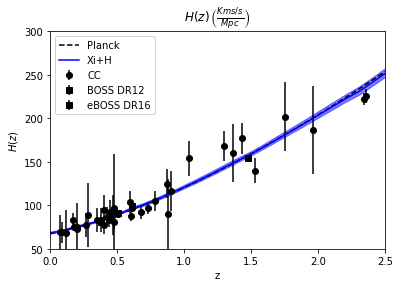

In [44]:
plt.plot(z_planck, Planck['Hkms_arr'], 'k--', label='Planck')

plt.errorbar(CC_data['z'], CC_data['data'], yerr = CC_data['err'], fmt='ko', label='CC')
plt.errorbar(BOSS_data['z'], BOSS_data['para_data'], yerr=BOSS_data['para_err'], fmt='ks', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], c/1000/(eBOSS_data['para_data']*eBOSS_data['rd']), 
             yerr = 1/eBOSS_data['rd']/(np.array([0.47])), fmt='ks', label='eBOSS DR16')

plt.plot(z_arr,  H_All_CMB_Xi_full_m, color ='b', label='Xi+H')
plt.fill_between(z_arr, H_All_CMB_Xi_full_m+H_All_CMB_Xi_full_s,
                 H_All_CMB_Xi_full_m-H_All_CMB_Xi_full_s, color='b', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
#plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

# dM

In [45]:
dM_DESI_m, dM_DESI_s = get_m_s(DESI['dMz'])
dM_DESI_CMB_m, dM_DESI_CMB_s = get_m_s(DESI_CMB['dMz'])
dM_All_m, dM_All_s = get_m_s(All['dMz'])
dM_All_CMB_m, dM_All_CMB_s = get_m_s(All_CMB['dMz'])
dM_All_CMB_hp_m, dM_All_CMB_hp_s = get_m_s(All_CMB_hp['dMz'])
dM_All_CMB_fm_m, dM_All_CMB_fm_s = get_m_s(All_CMB_fm['dMz'])
dM_All_CMB_Xi_full_m, dM_All_CMB_Xi_full_s = get_m_s(All_CMB_Xi_full['dMz'])
dM_SDSS_m, dM_SDSS_s = get_m_s(SDSS['dMz'])
dM_SDSS_CMB_m, dM_SDSS_CMB_s = get_m_s(SDSS_CMB['dMz'])
dM_Add_m, dM_Add_s = get_m_s(Add['dMz'])
dM_Add_CMB_m, dM_Add_CMB_s = get_m_s(Add_CMB['dMz'])

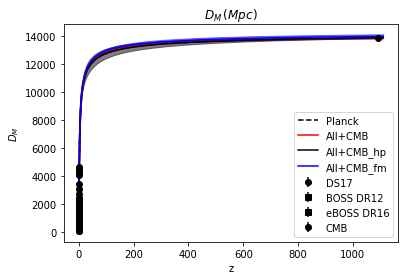

In [46]:
plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')

plt.errorbar(DS17_data['z'], (10**((DS17_data['data']-25+19.49)/5))/(1+DS17_data['z']),
             yerr=(10**(DS17_data['err']/5))/(1+DS17_data['z']), fmt='ko', label='DS17')
plt.errorbar(BOSS_data['z'], BOSS_data['perp_data'], yerr=BOSS_data['perp_err'], fmt='ks', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['perp_data']*eBOSS_data['rd'],
             yerr=np.array([0.79])*eBOSS_data['rd'], fmt='ks', label='eBOSS DR16')
plt.errorbar(CMB_data['z'], (1/CMB_data['data'])*(100*CMB_data['rd']),
             yerr=(1/CMB_data['err'])*1/(100*CMB_data['rd']), fmt='ko', label='CMB')

plt.plot(z_arr,  dM_All_CMB_m, color ='r', label='All+CMB')
plt.fill_between(z_arr, dM_All_CMB_m+dM_All_CMB_s, dM_All_CMB_m-dM_All_CMB_s, color='r', alpha=.5)
plt.plot(z_arr,  dM_All_CMB_hp_m, color ='k', label='All+CMB_hp')
plt.fill_between(z_arr, dM_All_CMB_hp_m+dM_All_CMB_hp_s,
                 dM_All_CMB_hp_m-dM_All_CMB_hp_s, color='k', alpha=.5)
plt.plot(z_arr,  dM_All_CMB_fm_m, color ='b', label='All+CMB_fm')
plt.fill_between(z_arr, dM_All_CMB_fm_m+dM_All_CMB_fm_s,
                 dM_All_CMB_fm_m-dM_All_CMB_fm_s, color='b', alpha=.5)

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_tests.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_tests.pdf')  

<ipython-input-48-ec917b638210>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_planck,  dM_All_CMB_m[:-1]/Planck['dM_arr'], color ='r', label='All+CMB Data')
<ipython-input-48-ec917b638210>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(z_planck, (dM_All_CMB_m+dM_All_CMB_s)[:-1]/Planck['dM_arr'],
<ipython-input-48-ec917b638210>:3: RuntimeWarning: invalid value encountered in true_divide
  (dM_All_CMB_m-dM_All_CMB_s)[:-1]/Planck['dM_arr'], color='r', alpha=.5)
<ipython-input-48-ec917b638210>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_planck,  dM_All_CMB_hp_m[:-1]/Planck['dM_arr'], color ='k', label='All+CMB_hp Data')
<ipython-input-48-ec917b638210>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(z_planck, (dM_All_CMB_hp_m+dM_All_CMB_hp_s)[:-1]/Planck['dM_arr'],
<ipython-input-48-ec917b638210>:6: RuntimeWarning: invalid value encountered in true_divide
  (dM_All_CMB_hp_m

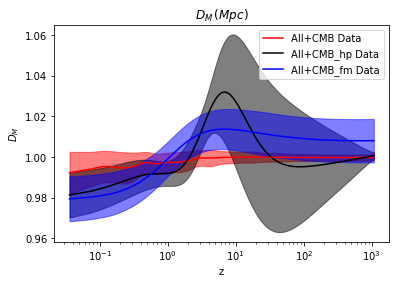

In [48]:
plt.plot(z_planck,  dM_All_CMB_m[:-1]/Planck['dM_arr'], color ='r', label='All+CMB Data')
plt.fill_between(z_planck, (dM_All_CMB_m+dM_All_CMB_s)[:-1]/Planck['dM_arr'],
                (dM_All_CMB_m-dM_All_CMB_s)[:-1]/Planck['dM_arr'], color='r', alpha=.5)
plt.plot(z_planck,  dM_All_CMB_hp_m[:-1]/Planck['dM_arr'], color ='k', label='All+CMB_hp Data')
plt.fill_between(z_planck, (dM_All_CMB_hp_m+dM_All_CMB_hp_s)[:-1]/Planck['dM_arr'],
                 (dM_All_CMB_hp_m-dM_All_CMB_hp_s)[:-1]/Planck['dM_arr'], color='k', alpha=.5)
plt.plot(z_planck,  dM_All_CMB_fm_m[:-1]/Planck['dM_arr'], color ='b', label='All+CMB_fm Data')
plt.fill_between(z_planck, (dM_All_CMB_fm_m+dM_All_CMB_fm_s)[:-1]/Planck['dM_arr'],
                 (dM_All_CMB_fm_m-dM_All_CMB_fm_s)[:-1]/Planck['dM_arr'], color='b', alpha=.5)

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();
plt.xscale('log')

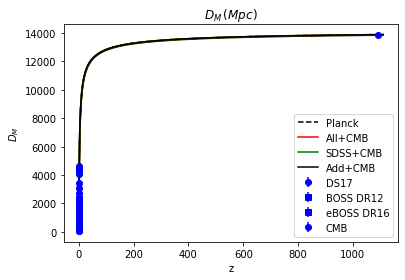

In [49]:
plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')

plt.errorbar(DS17_data['z'], (10**((DS17_data['data']-25+19.49)/5))/(1+DS17_data['z']),
             yerr=(10**(DS17_data['err']/5))/(1+DS17_data['z']), fmt='bo', label='DS17')
plt.errorbar(BOSS_data['z'], BOSS_data['perp_data'], yerr=BOSS_data['perp_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['perp_data']*eBOSS_data['rd'],
             yerr=np.array([0.79])*eBOSS_data['rd'], fmt='bs', label='eBOSS DR16')
plt.errorbar(CMB_data['z'], (1/CMB_data['data'])*(100*CMB_data['rd']),
             yerr=(1/CMB_data['err'])*1/(100*CMB_data['rd']), fmt='bo', label='CMB')

plt.plot(z_arr,  dM_All_CMB_m, color ='r', label='All+CMB')
plt.fill_between(z_arr, dM_All_CMB_m+dM_All_CMB_s,
                 dM_All_CMB_m-dM_All_CMB_s, color='r', alpha=.5)
plt.plot(z_arr,  dM_SDSS_CMB_m, color ='g', label='SDSS+CMB')
plt.fill_between(z_arr, dM_SDSS_CMB_m+dM_SDSS_CMB_s,
                 dM_SDSS_CMB_m-dM_SDSS_CMB_s, color='g', alpha=.5)
plt.plot(z_arr,  dM_Add_CMB_m, color ='k', label='Add+CMB')
plt.fill_between(z_arr, dM_Add_CMB_m+dM_Add_CMB_s,
                 dM_Add_CMB_m-dM_Add_CMB_s, color='k', alpha=.5)


plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')  

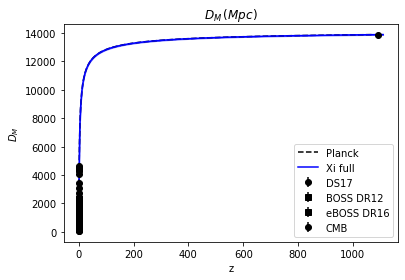

In [50]:
plt.plot(z_planck, Planck['dM_arr'], 'k--', label='Planck')

plt.errorbar(DS17_data['z'], (10**((DS17_data['data']-25+19.49)/5))/(1+DS17_data['z']),
             yerr=(10**(DS17_data['err']/5))/(1+DS17_data['z']), fmt='ko', label='DS17')
plt.errorbar(BOSS_data['z'], BOSS_data['perp_data'], yerr=BOSS_data['perp_err'], fmt='ks', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['perp_data']*eBOSS_data['rd'],
             yerr=np.array([0.79])*eBOSS_data['rd'], fmt='ks', label='eBOSS DR16')
plt.errorbar(CMB_data['z'], (1/CMB_data['data'])*(100*CMB_data['rd']),
             yerr=(1/CMB_data['err'])*1/(100*CMB_data['rd']), fmt='ko', label='CMB')

plt.plot(z_arr,  dM_All_CMB_Xi_full_m, color ='b', label='Xi full')
plt.fill_between(z_arr, dM_All_CMB_Xi_full_m+dM_All_CMB_Xi_full_s,
                 dM_All_CMB_Xi_full_m-dM_All_CMB_Xi_full_s, color='b', alpha=.5)

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_tests.pdf')
#plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_tests.pdf')  

# fs8

In [34]:
fs8_DESI_m, fs8_DESI_s = get_m_s(DESI['fs8z'])
fs8_DESI_CMB_m, fs8_DESI_CMB_s = get_m_s(DESI_CMB['fs8z'])
fs8_All_m, fs8_All_s = get_m_s(All['fs8z'])
fs8_All_gro_m, fs8_All_gro_s = get_m_s(All_gro['fs8z'])
fs8_All_CMB_m, fs8_All_CMB_s = get_m_s(All_CMB['fs8z'])
fs8_All_CMB_nowm_m, fs8_All_CMB_nowm_s = get_m_s(All_CMB_nowm['fs8z'])
fs8_All_CMB_fm_m, fs8_All_CMB_fm_s = get_m_s(All_CMB_fm['fs8z'])
#fs8_All_CMB_geo_m, fs8_All_CMB_geo_s = get_m_s(All_CMB_geo['fs8z'])
fs8_All_CMB_gro_m, fs8_All_CMB_gro_s = get_m_s(All_CMB_gro['fs8z'])
fs8_All_CMB_gro_hp_m, fs8_All_CMB_gro_hp_s = get_m_s(All_CMB_gro_hp['fs8z'])
fs8_All_CMB_hp_m, fs8_All_CMB_hp_s = get_m_s(All_CMB_hp['fs8z'])
fs8_All_CMB_Xi_m, fs8_All_CMB_Xi_s = get_m_s(All_CMB_Xi['fs8z'])
fs8_All_CMB_Xi_wm_m, fs8_All_CMB_Xi_wm_s = get_m_s(All_CMB_Xi_wm['fs8z'])
fs8_All_CMB_Xi_full_m, fs8_All_CMB_Xi_full_s = get_m_s(All_CMB_Xi_full['fs8z'])
fs8_SDSS_m, fs8_SDSS_s = get_m_s(SDSS['fs8z'])
fs8_SDSS_CMB_m, fs8_SDSS_CMB_s = get_m_s(SDSS_CMB['fs8z'])
fs8_Add_m, fs8_Add_s = get_m_s(Add['fs8z'])
fs8_Add_CMB_m, fs8_Add_CMB_s = get_m_s(Add_CMB['fs8z'])

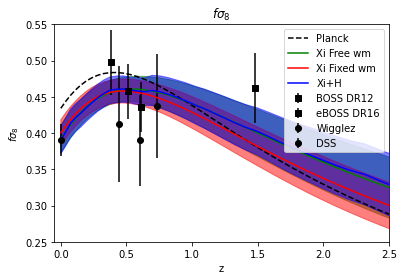

In [35]:
plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')
plt.errorbar(BOSS_data['z'], BOSS_data['fs8_data'], yerr=BOSS_data['fs8_err'], fmt='ks', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['fs8_data'], yerr=eBOSS_data['fs8_err'], fmt='ks', label='eBOSS DR16')
plt.errorbar(Wigglez_data['z'], Wigglez_data['data'], yerr=Wigglez_data['err'], fmt='ko', label='Wigglez')
plt.errorbar(DSS_data['z'], DSS_data['data'], yerr=DSS_data['err'], fmt='ko', label='DSS')

plt.plot(z_arr,  fs8_All_CMB_Xi_m, color ='g', label='Xi Free wm')
plt.fill_between(z_arr, fs8_All_CMB_Xi_m+fs8_All_CMB_Xi_s,
                 fs8_All_CMB_Xi_m-fs8_All_CMB_Xi_s, color='g', alpha=.5)
plt.plot(z_arr,  fs8_All_CMB_Xi_wm_m, color ='r', label='Xi Fixed wm')
plt.fill_between(z_arr, fs8_All_CMB_Xi_wm_m+fs8_All_CMB_Xi_wm_s,
                 fs8_All_CMB_Xi_wm_m-fs8_All_CMB_Xi_wm_s, color='r', alpha=.5)
plt.plot(z_arr,  fs8_All_CMB_Xi_full_m, color ='b', label='Xi+H')
plt.fill_between(z_arr, fs8_All_CMB_Xi_full_m+fs8_All_CMB_Xi_full_s,
                 fs8_All_CMB_Xi_full_m-fs8_All_CMB_Xi_full_s, color='b', alpha=.5)


plt.xlim(-0.05, 2.5)
plt.ylim(0.25, 0.55)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

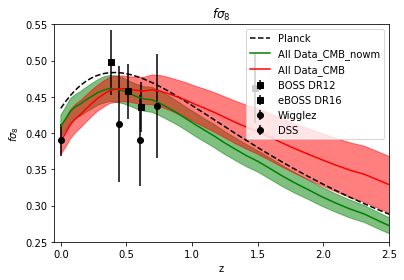

In [74]:
plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')
plt.errorbar(BOSS_data['z'], BOSS_data['fs8_data'], yerr=BOSS_data['fs8_err'], fmt='ks', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['fs8_data'], yerr=eBOSS_data['fs8_err'], fmt='ks', label='eBOSS DR16')
plt.errorbar(Wigglez_data['z'], Wigglez_data['data'], yerr=Wigglez_data['err'], fmt='ko', label='Wigglez')
plt.errorbar(DSS_data['z'], DSS_data['data'], yerr=DSS_data['err'], fmt='ko', label='DSS')


#plt.plot(z_arr,  fs8_All_CMB_fm_m, color ='b', label='All Data_CMB_fm')
#plt.fill_between(z_arr, fs8_All_CMB_fm_m+fs8_All_CMB_fm_s,
#                 fs8_All_CMB_fm_m-fs8_All_CMB_fm_s, color='b', alpha=.5)
plt.plot(z_arr,  fs8_All_CMB_nowm_m, color ='g', label='All Data_CMB_nowm')
plt.fill_between(z_arr, fs8_All_CMB_nowm_m+fs8_All_CMB_nowm_s,
                 fs8_All_CMB_nowm_m-fs8_All_CMB_nowm_s, color='g', alpha=.5)
#plt.plot(z_arr,  fs8_All_CMB_hp_m, color ='k', label='All Data_CMB_hp')
#plt.fill_between(z_arr, fs8_All_CMB_hp_m+fs8_All_CMB_hp_s,
#                 fs8_All_CMB_hp_m-fs8_All_CMB_hp_s, color='k', alpha=.5)
plt.plot(z_arr,  fs8_All_CMB_m, color ='r', label='All Data_CMB')
plt.fill_between(z_arr, fs8_All_CMB_m+fs8_All_CMB_s,
                 fs8_All_CMB_m-fs8_All_CMB_s, color='r', alpha=.5)


plt.xlim(-0.05, 2.5)
plt.ylim(0.25, 0.55)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_tests.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_tests.pdf')  

In [77]:
np.mean(All_CMB_nowm['s80'])

0.7753771750553066

In [78]:
np.mean(All_CMB['s80'])

0.9722486636116461

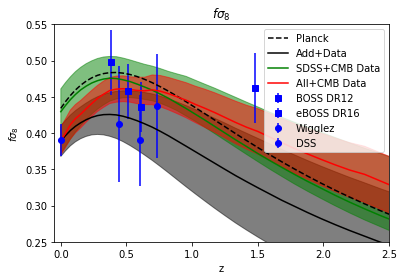

In [54]:
plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')
plt.errorbar(BOSS_data['z'], BOSS_data['fs8_data'], yerr=BOSS_data['fs8_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['fs8_data'], yerr=eBOSS_data['fs8_err'], fmt='bs', label='eBOSS DR16')
plt.errorbar(Wigglez_data['z'], Wigglez_data['data'], yerr=Wigglez_data['err'], fmt='bo', label='Wigglez')
plt.errorbar(DSS_data['z'], DSS_data['data'], yerr=DSS_data['err'], fmt='bo', label='DSS')

plt.plot(z_arr,  fs8_Add_CMB_m, color ='k', label='Add+Data')
plt.fill_between(z_arr, fs8_Add_CMB_m+fs8_Add_CMB_s,
                 fs8_Add_CMB_m-fs8_Add_CMB_s, color='k', alpha=.5)

plt.plot(z_arr,  fs8_SDSS_m, color ='g', label='SDSS+CMB Data')
plt.fill_between(z_arr, fs8_SDSS_CMB_m+fs8_SDSS_CMB_s,
                 fs8_SDSS_CMB_m-fs8_SDSS_CMB_s, color='g', alpha=.5)

plt.plot(z_arr,  fs8_All_CMB_m, color ='r', label='All+CMB Data')
plt.fill_between(z_arr, fs8_All_CMB_m+fs8_All_CMB_s,
                 fs8_All_CMB_m-fs8_All_CMB_s, color='r', alpha=.5)

plt.xlim(-0.05, 2.5)
plt.ylim(0.25, 0.55)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')  

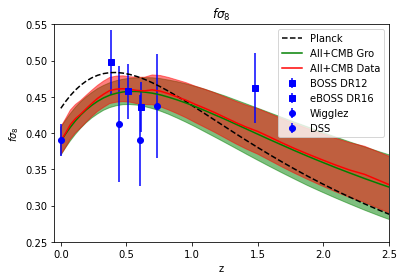

In [55]:
plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')
plt.errorbar(BOSS_data['z'], BOSS_data['fs8_data'], yerr=BOSS_data['fs8_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['fs8_data'], yerr=eBOSS_data['fs8_err'], fmt='bs', label='eBOSS DR16')
plt.errorbar(Wigglez_data['z'], Wigglez_data['data'], yerr=Wigglez_data['err'], fmt='bo', label='Wigglez')
plt.errorbar(DSS_data['z'], DSS_data['data'], yerr=DSS_data['err'], fmt='bo', label='DSS')

plt.plot(z_arr,  fs8_All_CMB_gro_m, color ='g', label='All+CMB Gro')
plt.fill_between(z_arr, fs8_All_CMB_gro_m+fs8_All_CMB_gro_s,
                 fs8_All_CMB_gro_m-fs8_All_CMB_gro_s, color='g', alpha=.5)

plt.plot(z_arr,  fs8_All_CMB_m, color ='r', label='All+CMB Data')
plt.fill_between(z_arr, fs8_All_CMB_m+fs8_All_CMB_s,
                 fs8_All_CMB_m-fs8_All_CMB_s, color='r', alpha=.5)

plt.xlim(-0.05, 2.5)
plt.ylim(0.25, 0.55)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')  

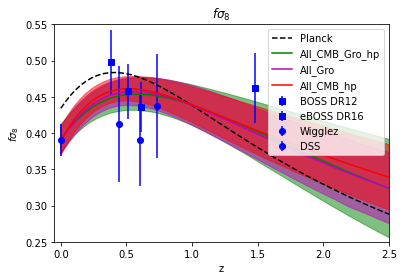

In [58]:
plt.plot(z_planck, Planck['fs8_arr'], 'k--', label='Planck')
plt.errorbar(BOSS_data['z'], BOSS_data['fs8_data'], yerr=BOSS_data['fs8_err'], fmt='bs', label='BOSS DR12')
plt.errorbar(eBOSS_data['z'], eBOSS_data['fs8_data'], yerr=eBOSS_data['fs8_err'], fmt='bs', label='eBOSS DR16')
plt.errorbar(Wigglez_data['z'], Wigglez_data['data'], yerr=Wigglez_data['err'], fmt='bo', label='Wigglez')
plt.errorbar(DSS_data['z'], DSS_data['data'], yerr=DSS_data['err'], fmt='bo', label='DSS')

plt.plot(z_arr,  fs8_All_CMB_gro_hp_m, color ='g', label='All_CMB_Gro_hp')
plt.fill_between(z_arr, fs8_All_CMB_gro_hp_m+fs8_All_CMB_gro_hp_s,
                 fs8_All_CMB_gro_hp_m-fs8_All_CMB_gro_hp_s, color='g', alpha=.5)

plt.plot(z_arr,  fs8_All_gro_m, color ='m', label='All_Gro')
plt.fill_between(z_arr, fs8_All_gro_m+fs8_All_gro_s,
                 fs8_All_gro_m-fs8_All_gro_s, color='m', alpha=.5)

plt.plot(z_arr,  fs8_All_CMB_hp_m, color ='r', label='All_CMB_hp')
plt.fill_between(z_arr, fs8_All_CMB_hp_m+fs8_All_CMB_hp_s,
                 fs8_All_CMB_hp_m-fs8_All_CMB_hp_s, color='r', alpha=.5)

plt.xlim(-0.05, 2.5)
plt.ylim(0.25, 0.55)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')  

# 3D Plots

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import gaussian_kde

def confidence_ellipse(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [ ]:
x = All_CMB_gro_hp['omega_m']
y = np.transpose(All_CMB_gro_hp['DHz'])[0]
plt.hist2d(x, y, 50, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.animation as animation

frames = len(z_arr)
x = All_CMB_gro_hp['omega_m']
ys = np.transpose(All_CMB_gro_hp['DHz'])
fig, ax = plt.subplots()

def update(i):
    # clear the axis each frame
    ax.clear()

    # replot things
    lims_x = [0.05, 0.3]
    lims_y = [-0.5, 1.5]
    x = All_CMB_gro_hp['omega_m']
    y = ys[i]
    #xy = np.transpose([x,y])
    #sel_xy = ((lims_x[0]<=x) & (x<lims_x[1])).any() or ((lims_y[0]<=y) & (y<lims_y[1])).any()
    #xy = xy[sel_xy]
    #x = np.transpose(xy)[0]
    #y = np.transpose(xy)[1]
    
    plt.hist2d(x, y, 100, cmap=plt.cm.jet)
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    #ax.scatter(x, y, c=z, s=0.5)
    #confidence_ellipse(x, y, ax.axes, edgecolor='red')

    # reformat things
    ax.set_xlim(lims_x)
    ax.set_ylim(lims_y)
    ax.set_xlabel(r'$\omega_m$')
    ax.set_ylabel(r'$\delta H(z)$')
    ax.set_title('z = {}'.format(round(z_arr[i],2)))
   

ani = animation.FuncAnimation(fig, update, frames=frames, interval=10)
ani.save('scatter.gif', writer='pillow')

# Corr Plots

In [59]:
corrs = []
x = All_CMB_gro_hp['omega_m']
ys = np.transpose(All_CMB_gro_hp['DHz'])
for i in np.arange(len(z_arr)):
    y = ys[i]
    corr = np.mean((x-np.mean(x))*(y-np.mean(y)))
    corr /= np.std(x)
    corr /= np.std(y)
    corrs.append(corr)

In [60]:
corrs2 = []
x = All_gro['omega_m']
ys = np.transpose(All_gro['DHz'])
for i in np.arange(len(z_arr)):
    y = ys[i]
    corr2 = np.mean((x-np.mean(x))*(y-np.mean(y)))
    corr2 /= np.std(x)
    corr2 /= np.std(y)
    corrs2.append(corr2)

<ipython-input-63-e69333b7cb1a>:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1100)


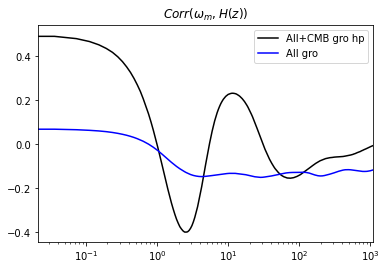

In [63]:
alpha = np.std(corrs)/np.std(dH_All_CMB_gro_hp_m)
#alpha = np.std(corrs)/np.std(dH_SDSS_CMB_m)
plt.plot(z_arr, corrs, 'k-', label='All+CMB gro hp')
plt.plot(z_arr, corrs2, 'b-', label='All gro')
#plt.plot(z_arr,  dH_All_CMB_gro_m*alpha, color ='r', label=r'$\alpha \, \delta H(z) $')
#plt.fill_between(z_arr, (dH_All_CMB_gro_m+dH_All_CMB_gro_s)*alpha,
#                 (dH_All_CMB_gro_m-dH_All_CMB_gro_s)*alpha, color='r', alpha=.5)
#plt.plot(z_arr,  dH_SDSS_CMB_m*alpha, color ='g', label=r'$\alpha \, \delta H(z) $')
#plt.fill_between(z_arr, (dH_SDSS_CMB_m+dH_SDSS_CMB_s)*alpha,
#                 (dH_SDSS_CMB_m-dH_SDSS_CMB_s)*alpha, color='g', alpha=.5)
plt.title('$Corr(\omega_m, H(z))$')
plt.xscale('log')
plt.xlim(0,1100)
plt.legend()
plt.show()

In [62]:
alt_cor = np.mean((dH_All_CMB_gro_m-np.mean(dH_All_CMB_gro_m))*(corrs-np.mean(corrs)))
alt_cor /= np.std(dH_All_CMB_gro_m)
alt_cor /= np.std(corrs)
print(alt_cor)

0.12689322134340283


In [ ]:
np.std(corrs)/np.std(dH_All_CMB_m)

In [ ]:
np.mean(dH_All_CMB_m)